# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import ttest_ind

from sklearn.ensemble import GradientBoostingRegressor


warnings.filterwarnings('ignore')


# Loading dataset

In [2]:
# Load the dataset
df = pd.read_csv('movie_metadata.csv')

# Movie Metadata Dataset Preprocessing

The code performs data preprocessing on a movie metadata dataset. It first loads the dataset, displays a summary of missing values, then handles these by dropping rows with missing values in critical columns and filling in missing values for numerical columns with their mean and for categorical columns with their mode. After processing, it checks and prints out any remaining missing values in the dataset.

In [3]:
# Display initial missing values summary
missing_values = df.isna().sum()
missing_percentage = (df.isna().sum() / df.shape[0]) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

missing_data = missing_data[missing_data['Missing Values'] > 0]
print("Initial summary of missing and NaN values in the dataset:")
print(missing_data)
print()

# Drop rows with missing values in critical columns
df = df.dropna(subset=['gross', 'budget'])

# Fill missing values with the mean for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill missing values with the mode for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Verify that there are no more missing values
missing_values_after = df.isna().sum()
missing_percentage_after = (df.isna().sum() / df.shape[0]) * 100

missing_data_after = pd.DataFrame({
    'Missing Values': missing_values_after,
    'Percentage': missing_percentage_after
})

missing_data_after = missing_data_after[missing_data_after['Missing Values'] > 0]
print("Summary of missing and NaN values in the dataset after handling:")
print(missing_data_after)


# Drop rows with missing values in critical columns
df = df.dropna(subset=['gross', 'budget'])

# Fill missing values with the mean for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill missing values with the mode for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

df


Initial summary of missing and NaN values in the dataset:
                         Missing Values  Percentage
color                                19    0.376760
director_name                       104    2.062265
num_critic_for_reviews               50    0.991473
duration                             15    0.297442
director_facebook_likes             104    2.062265
actor_3_facebook_likes               23    0.456078
actor_2_name                         13    0.257783
actor_1_facebook_likes                7    0.138806
gross                               884   17.529248
actor_1_name                          7    0.138806
actor_3_name                         23    0.456078
facenumber_in_poster                 13    0.257783
plot_keywords                       153    3.033908
num_user_for_reviews                 21    0.416419
language                             14    0.277613
country                               5    0.099147
content_rating                      303    6.008328
budget

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.780000,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.350000,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.350000,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.350000,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.350000,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.850000,19000
5034,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,...,35.0,English,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,2.109751,74
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.370000,0
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,...,14.0,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,2.109751,413


# Visualization and Statistical Analysis of Movie Metadata
This Python script performs an extensive visualization and statistical analysis of independent variables in a movie metadata dataset. It includes:

Scatter Plots: Visualizes each variable against the dataset index to detect patterns or anomalies.
Box Plots: Provides an overview of the distribution and identifies outliers for all variables.
Histograms: Shows the frequency distribution of each variable, with a kernel density estimate to observe the shape of the distribution.
Normal Q-Q Plots: Assesses the normality of the distributions by comparing them to a theoretical normal distribution.
Parameter Estimation: Calculates and displays the mean, standard deviation, and proportion of non-missing values for each variable.
The visualizations and calculations help in understanding the characteristics of the dataset’s variables, aiding in further data cleaning, transformation, and analysis.

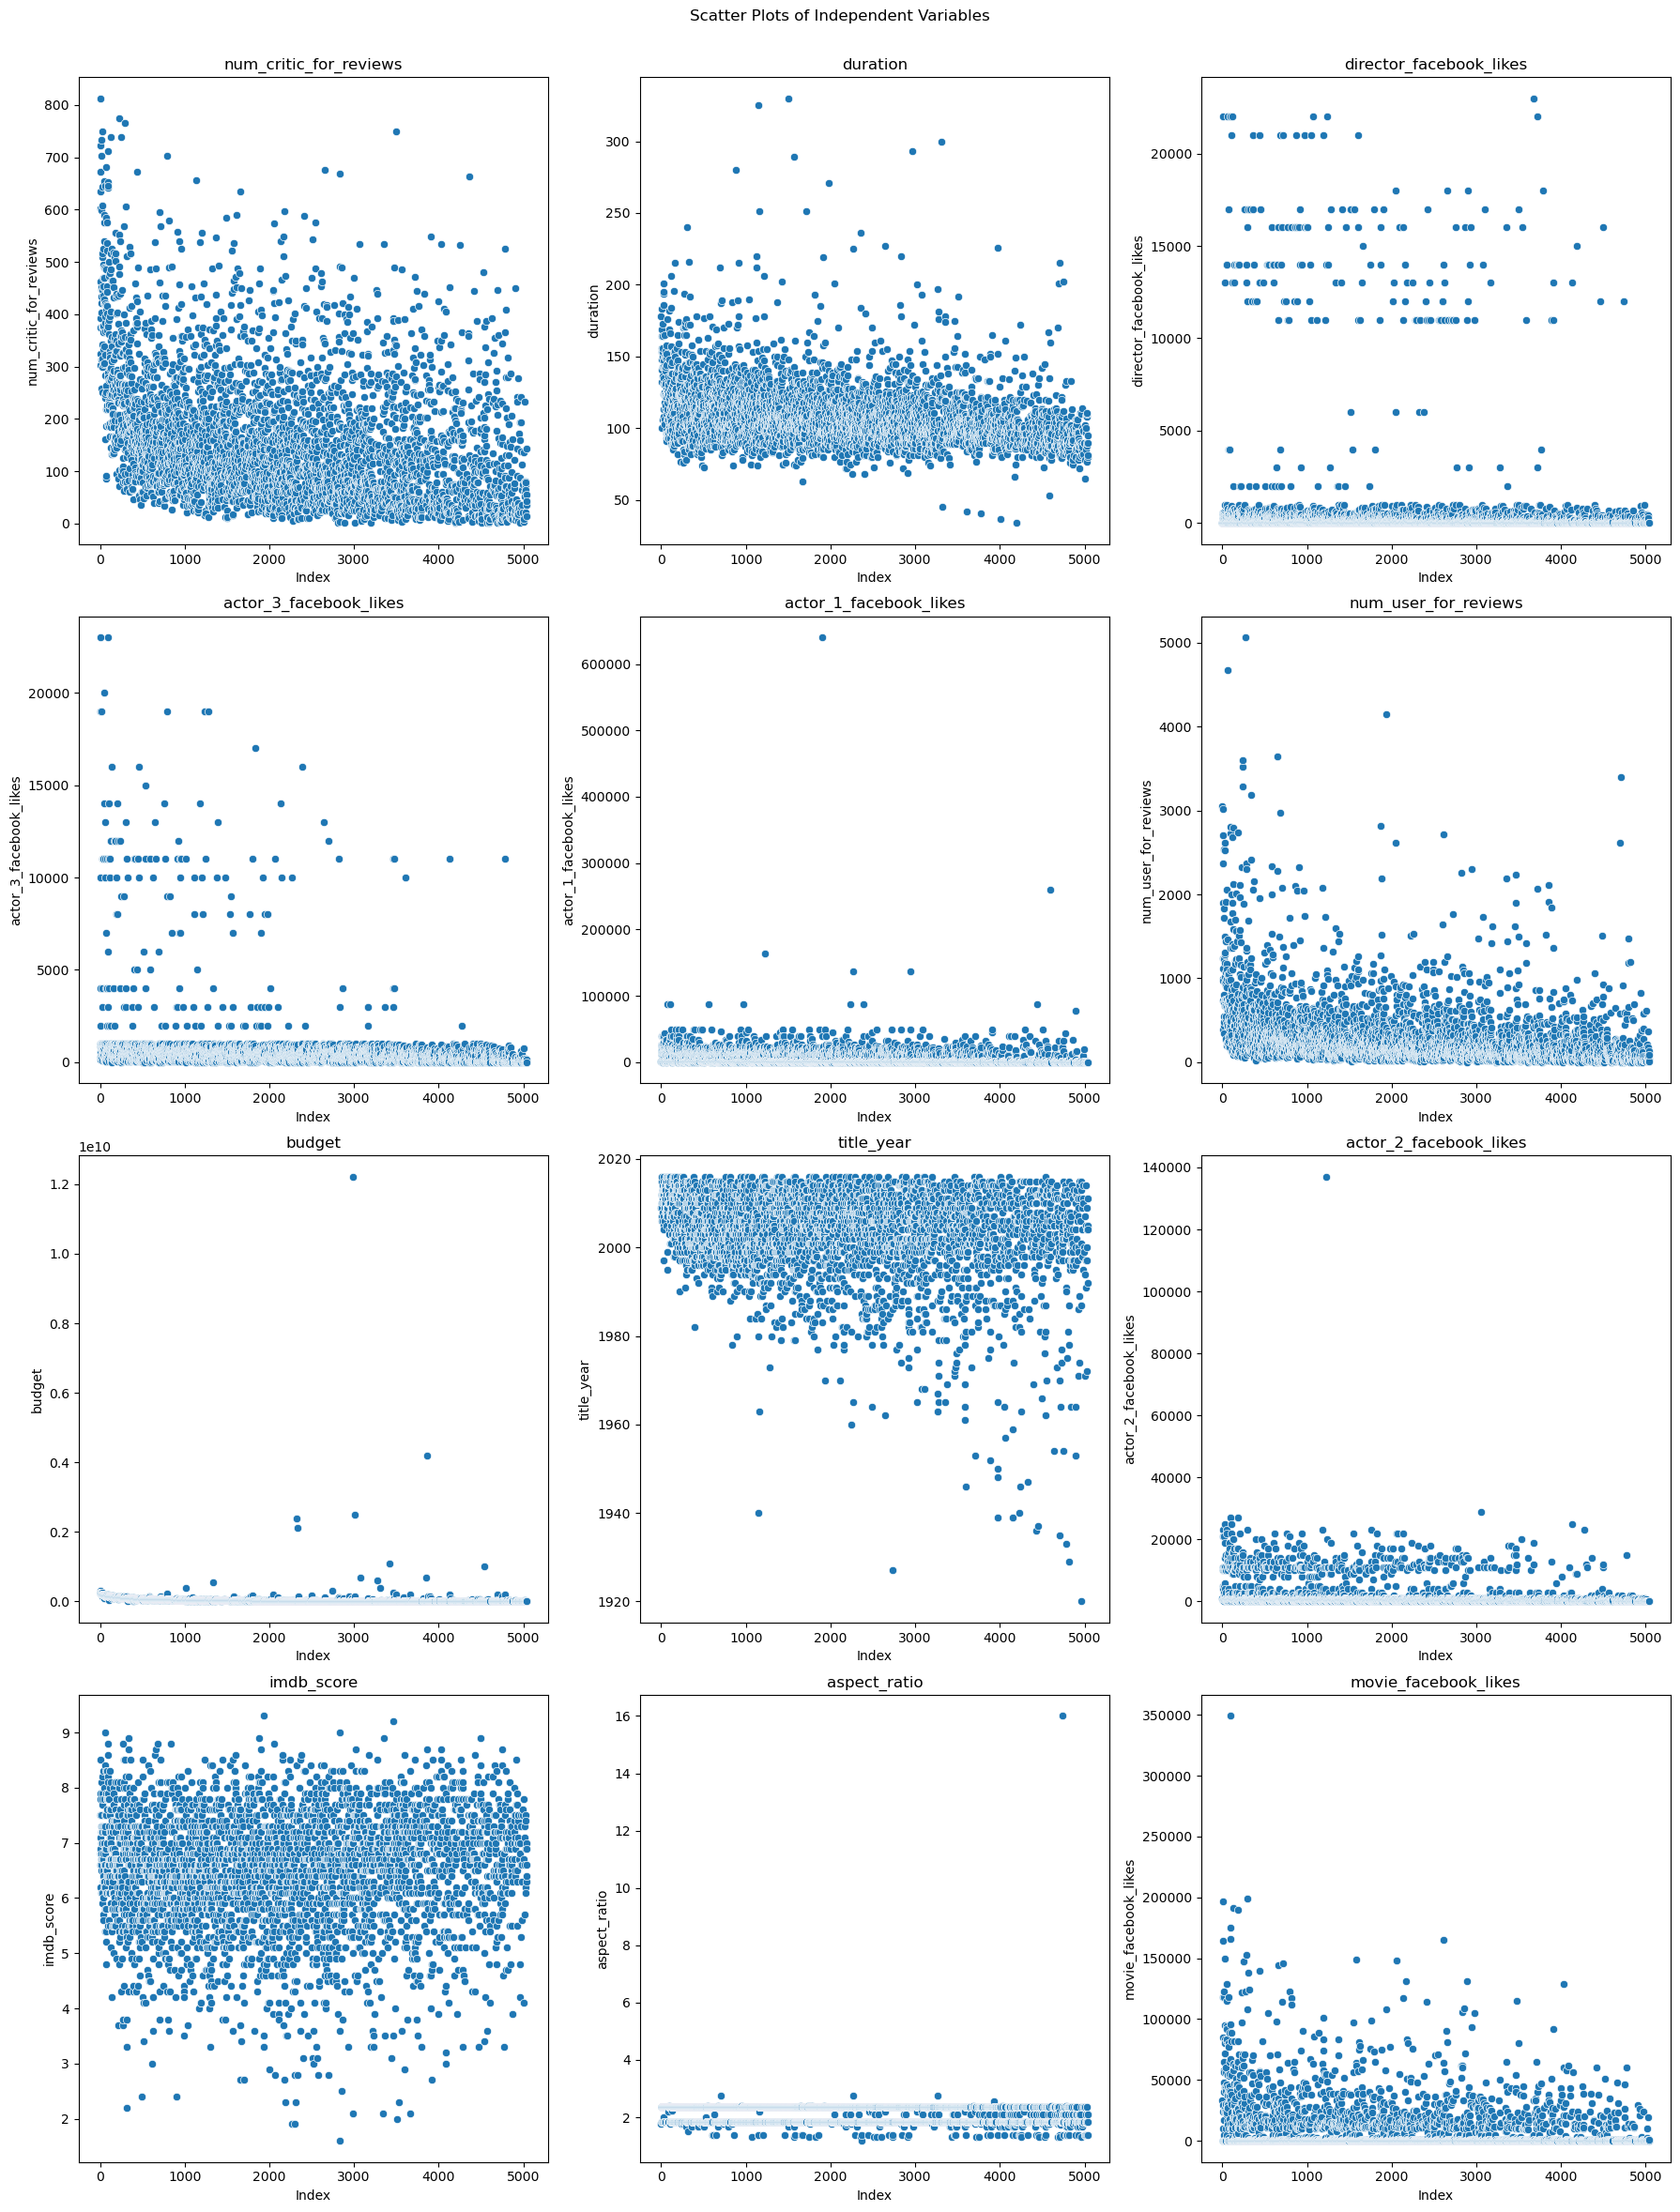

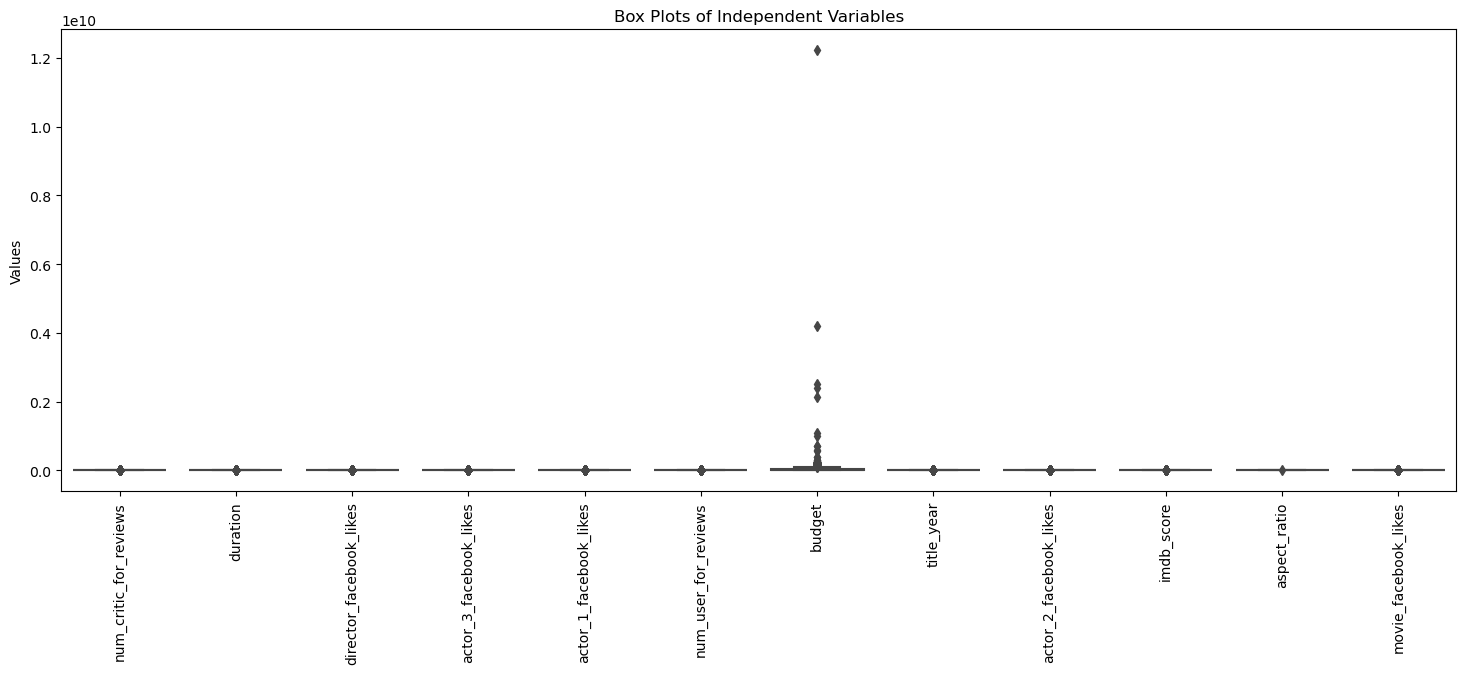

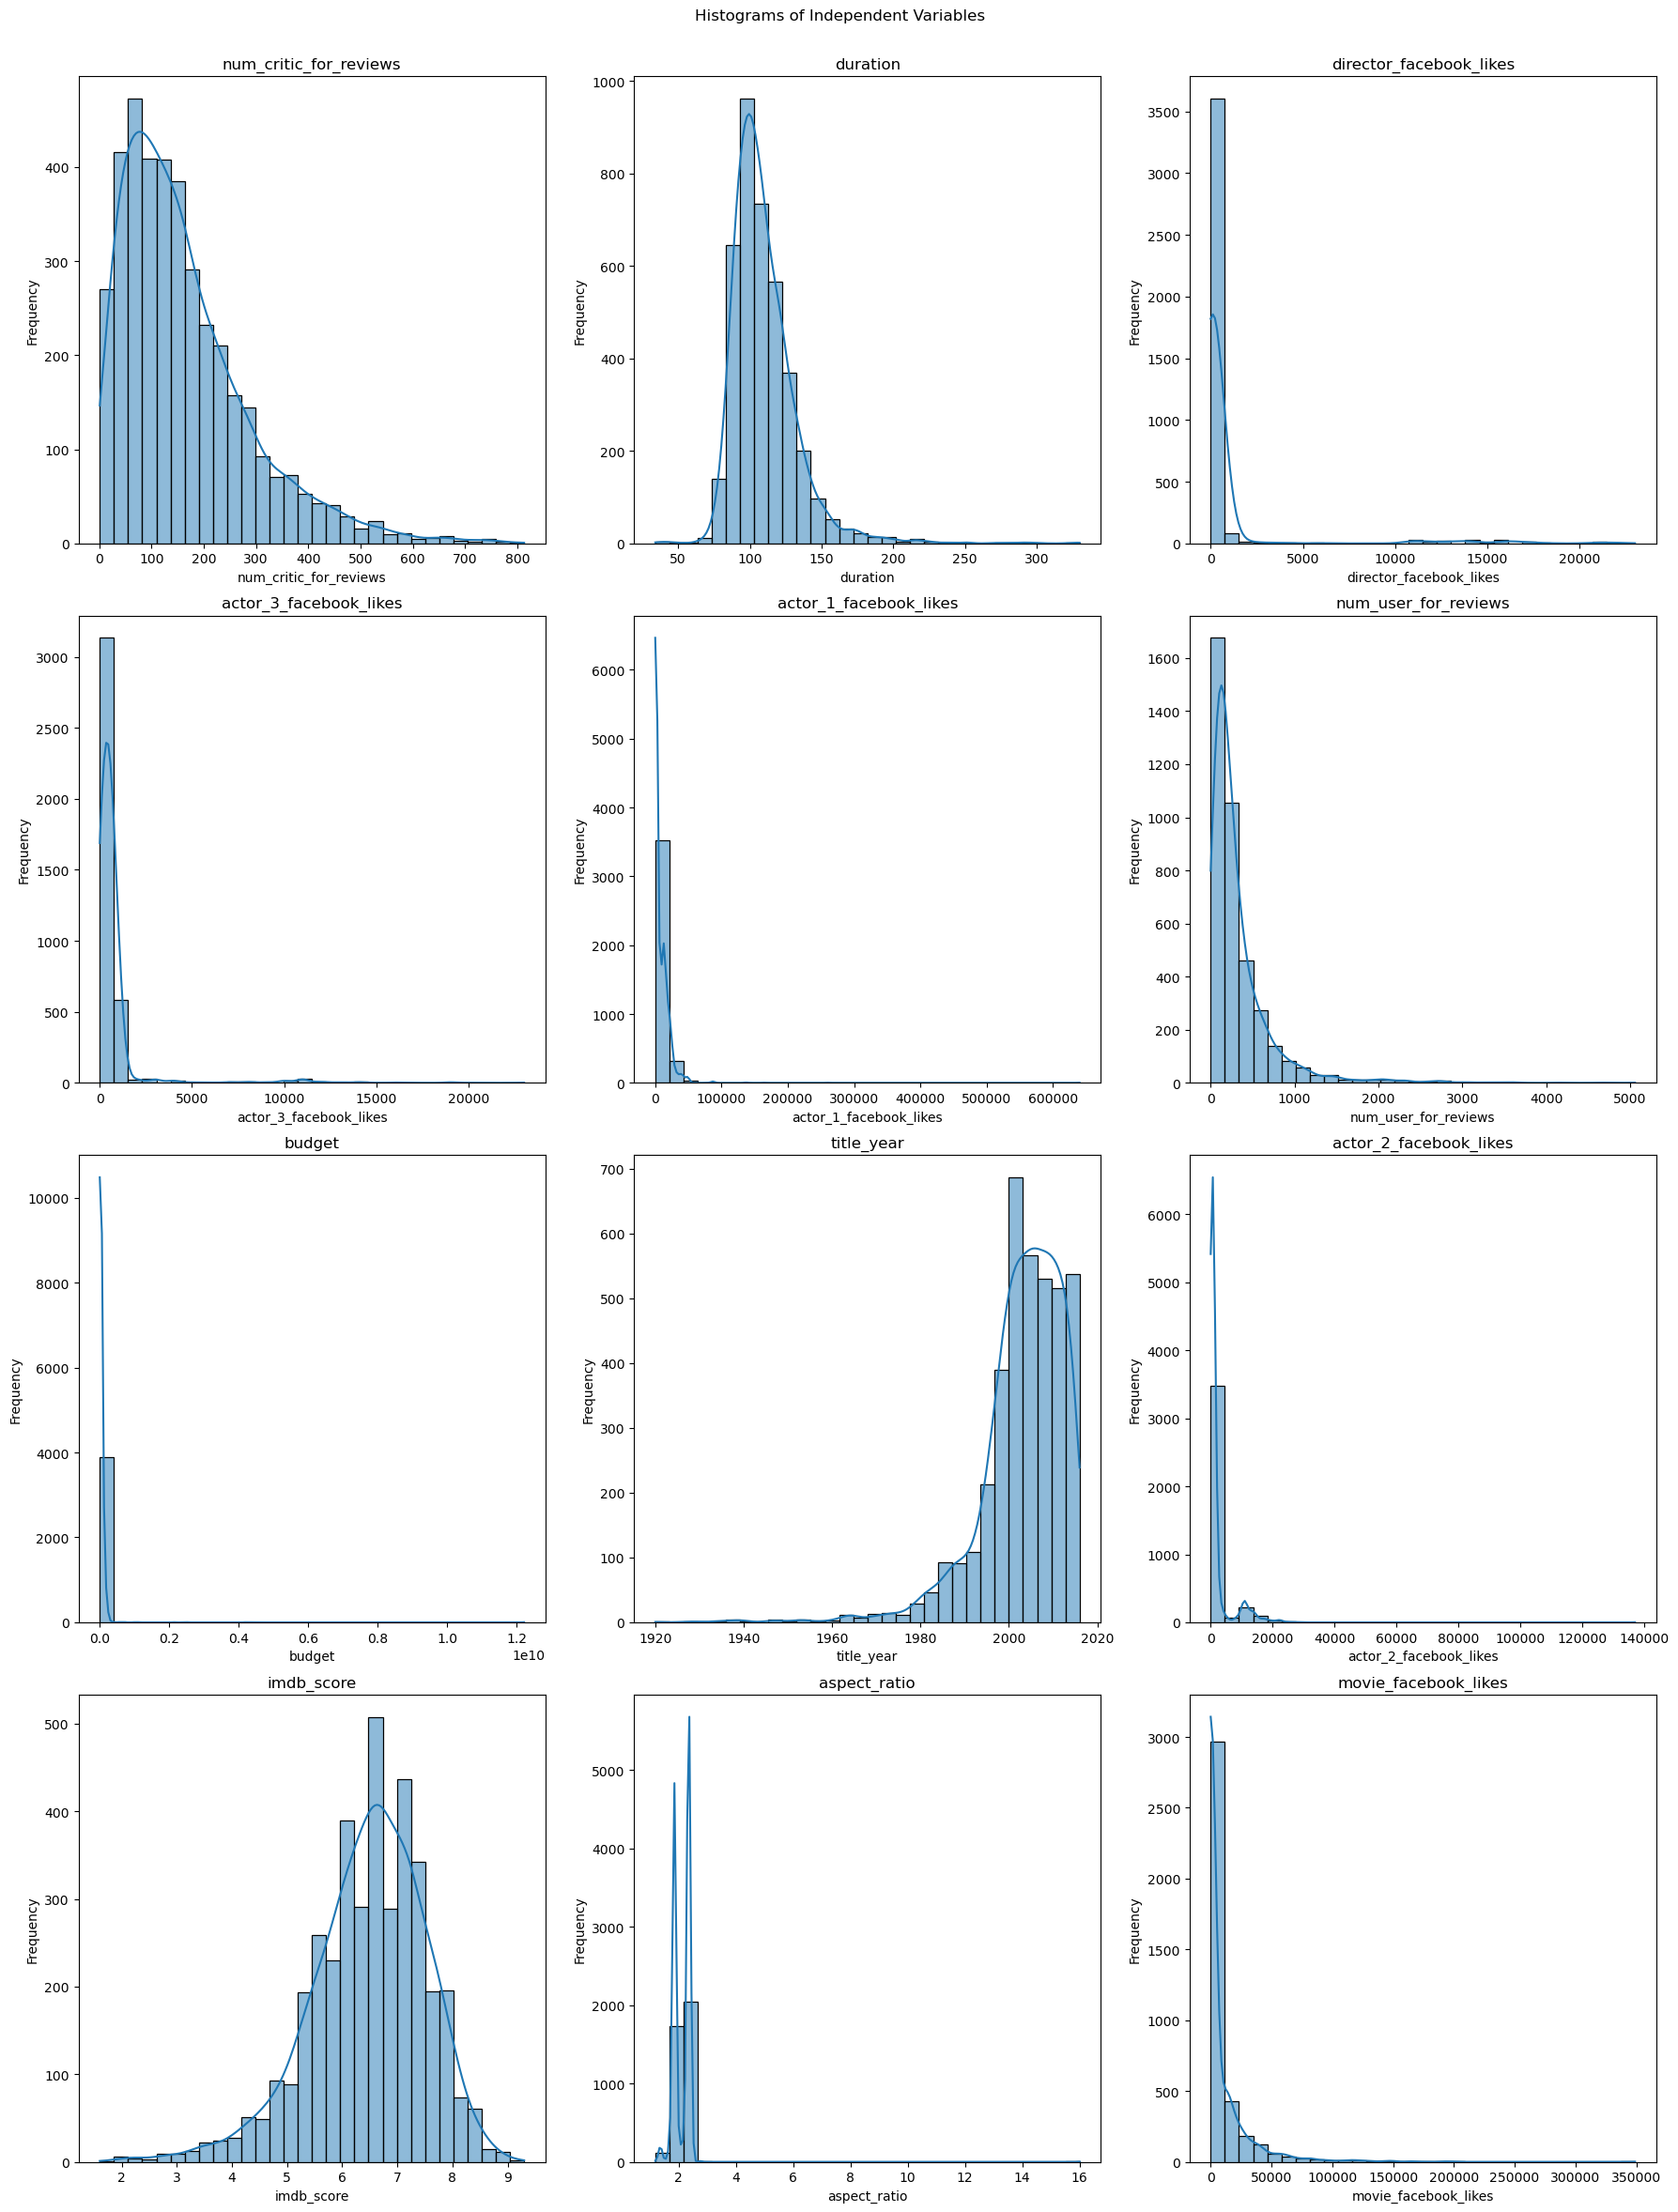

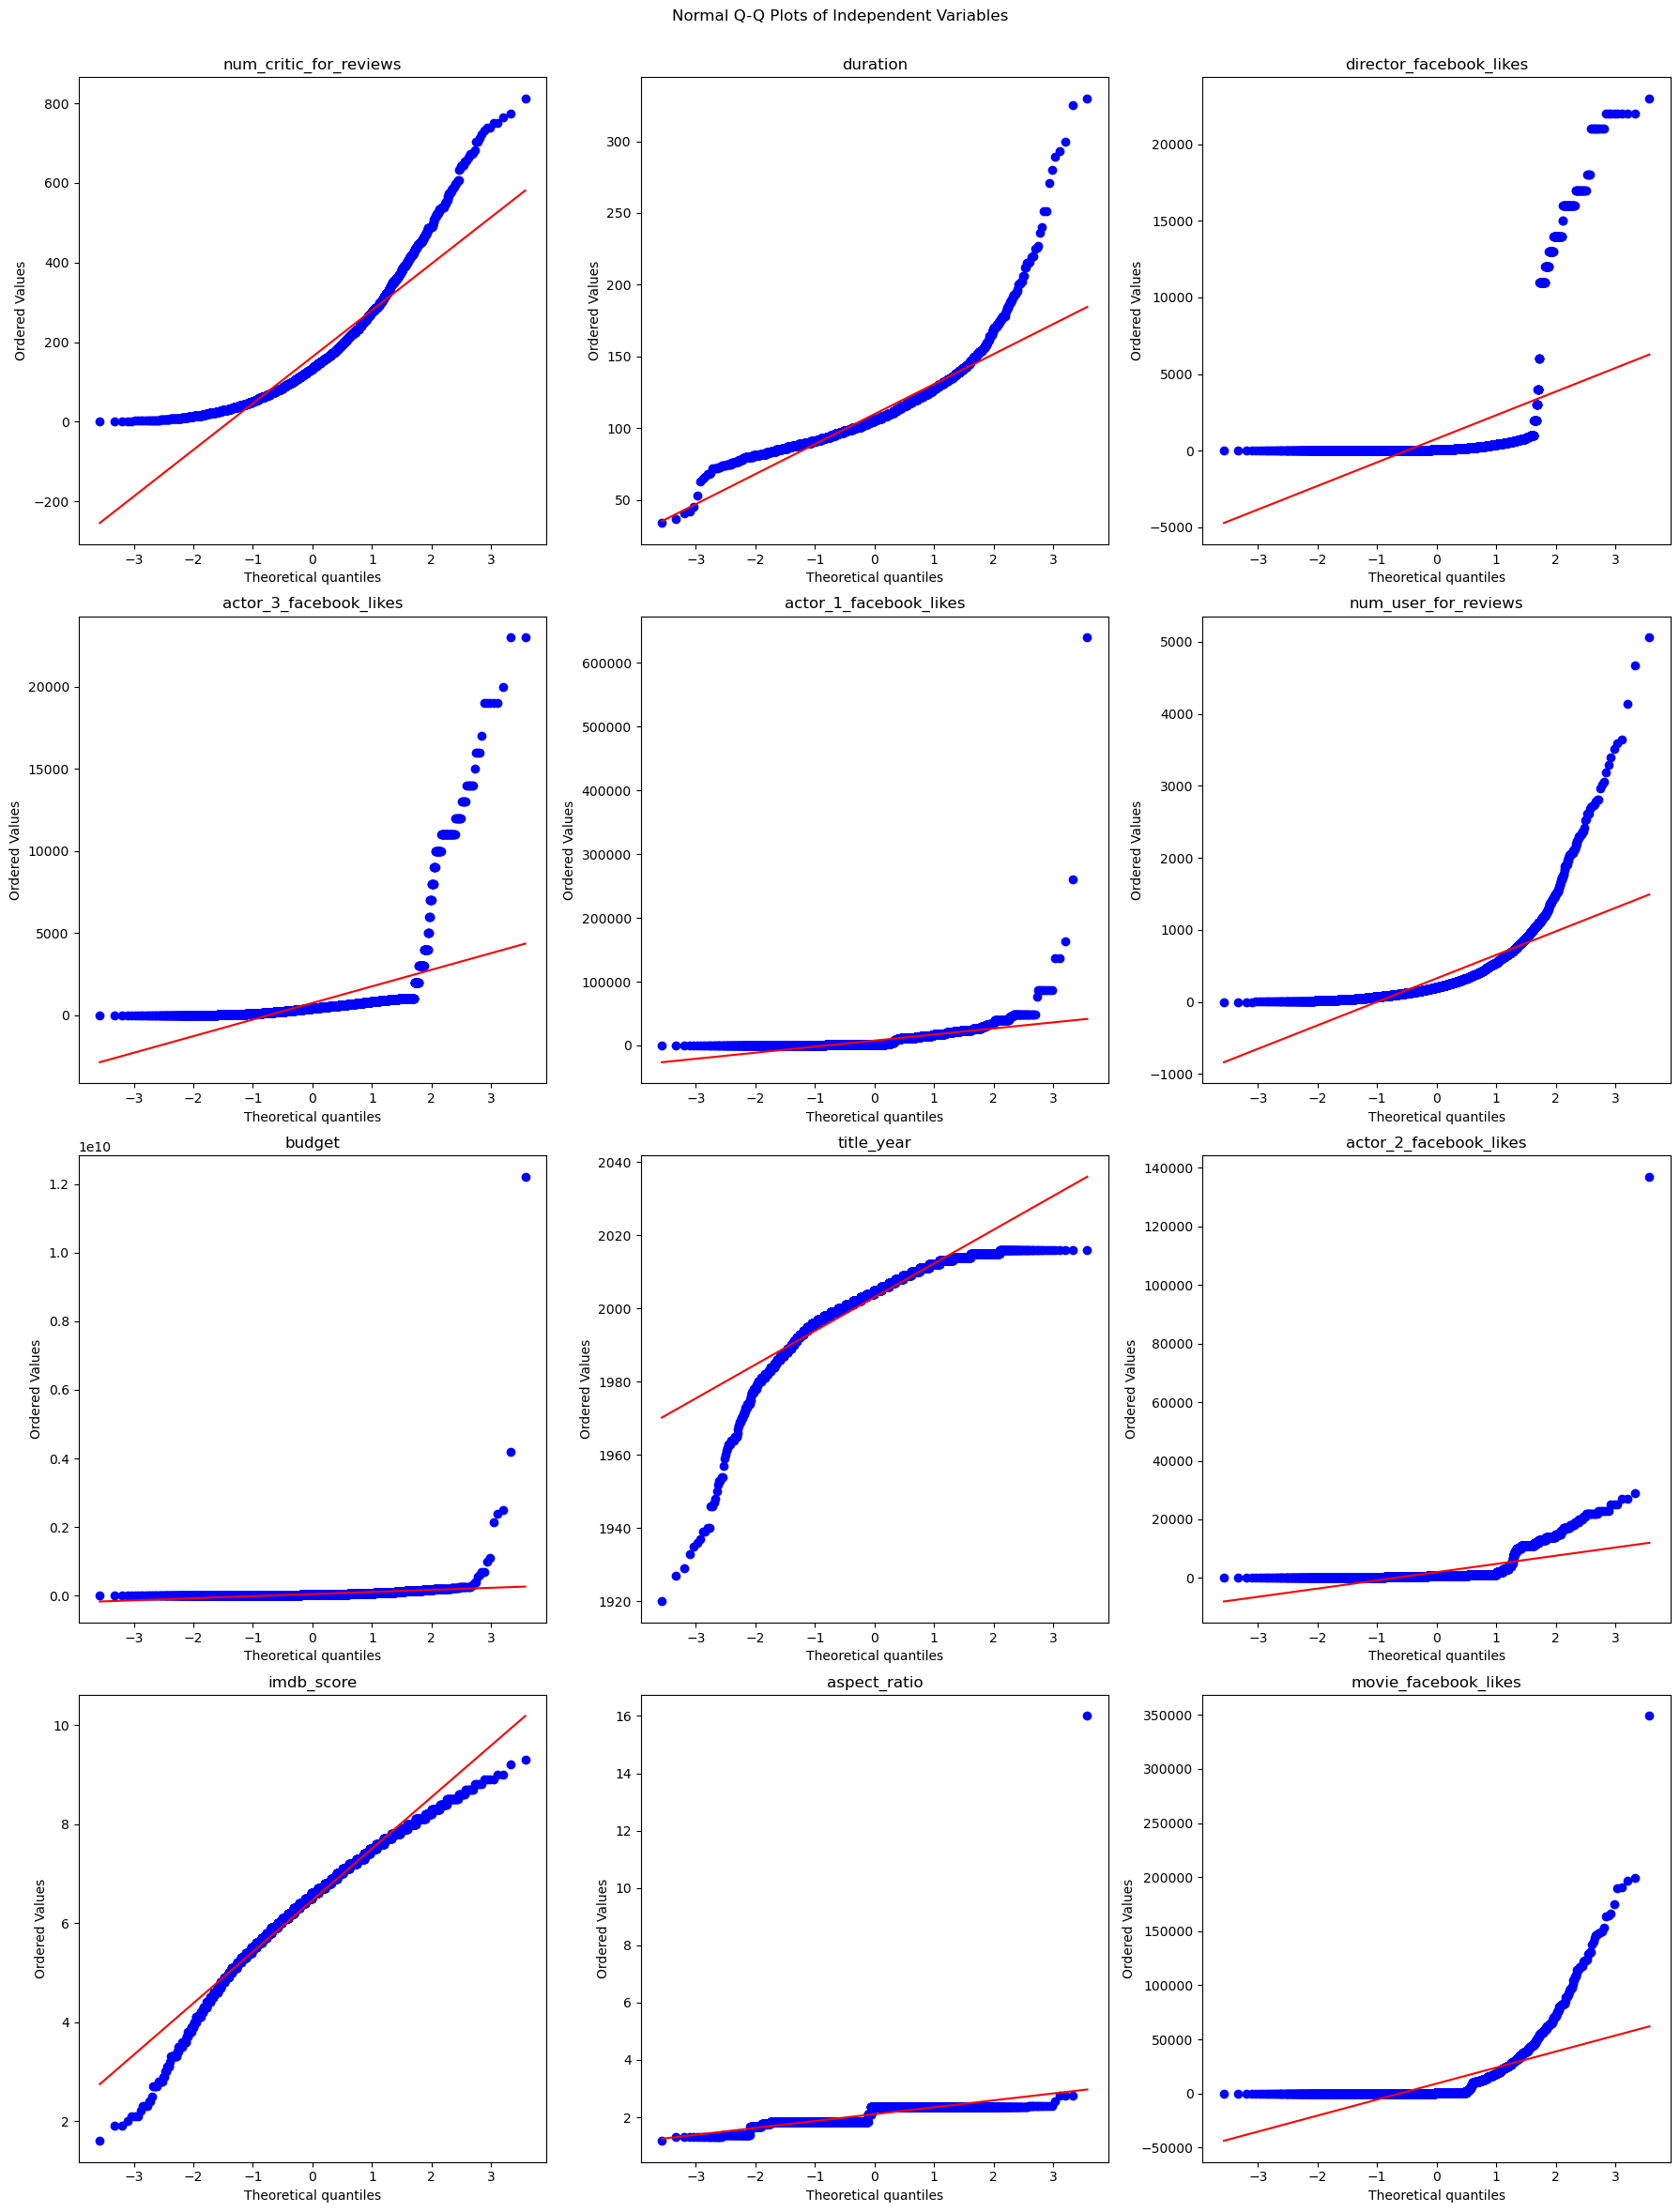

                   Variable          Mean  Standard Deviation  Proportion
0    num_critic_for_reviews  1.632347e+02        1.240378e+02         1.0
1                  duration  1.098964e+02        2.270386e+01         1.0
2   director_facebook_likes  7.813074e+02        3.017677e+03         1.0
3    actor_3_facebook_likes  7.535349e+02        1.864232e+03         1.0
4    actor_1_facebook_likes  7.584676e+03        1.536015e+04         1.0
5      num_user_for_reviews  3.273099e+02        4.080063e+02         1.0
6                    budget  4.521028e+07        2.223895e+08         1.0
7                title_year  2.003081e+03        1.000135e+01         1.0
8    actor_2_facebook_likes  1.970657e+03        4.482847e+03         1.0
9                imdb_score  6.463506e+00        1.056080e+00         1.0
10             aspect_ratio  2.109751e+00        3.490021e-01         1.0
11     movie_facebook_likes  9.138153e+03        2.130276e+04         1.0


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Independent numerical variables (features)
independent_vars = [
    'num_critic_for_reviews', 'duration', 'director_facebook_likes',
    'actor_3_facebook_likes', 'actor_1_facebook_likes', 'num_user_for_reviews',
    'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
    'aspect_ratio', 'movie_facebook_likes'
]

# Create subplots for scatter plots, box plots, and histograms
fig, axes = plt.subplots(4, 3, figsize=(18, 24))
fig.suptitle('Scatter Plots of Independent Variables')

for i, var in enumerate(independent_vars):
    sns.scatterplot(x=df.index, y=df[var], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(var)
    axes[i//3, i%3].set_xlabel('Index')
    axes[i//3, i%3].set_ylabel(var)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# Box plots
fig, axes = plt.subplots(1, 1, figsize=(18, 6))
sns.boxplot(data=df[independent_vars], ax=axes)
axes.set_title('Box Plots of Independent Variables')
axes.set_ylabel('Values')
plt.xticks(rotation=90)
plt.show()

# Histograms
fig, axes = plt.subplots(4, 3, figsize=(18, 24))
fig.suptitle('Histograms of Independent Variables')

for i, var in enumerate(independent_vars):
    sns.histplot(df[var], kde=True, bins=30, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(var)
    axes[i//3, i%3].set_xlabel(var)
    axes[i//3, i%3].set_ylabel('Frequency')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# Normal Q-Q plots
fig, axes = plt.subplots(4, 3, figsize=(18, 24))
fig.suptitle('Normal Q-Q Plots of Independent Variables')

for i, var in enumerate(independent_vars):
    stats.probplot(df[var], dist="norm", plot=axes[i//3, i%3])
    axes[i//3, i%3].set_title(var)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# Parameters estimation
params = {'Variable': [], 'Mean': [], 'Standard Deviation': [], 'Proportion': []}

for var in independent_vars:
    mean = df[var].mean()
    std_dev = df[var].std()
    proportion = df[var].count() / df.shape[0]
    params['Variable'].append(var)
    params['Mean'].append(mean)
    params['Standard Deviation'].append(std_dev)
    params['Proportion'].append(proportion)

params_df = pd.DataFrame(params)
print(params_df)


# EDA Plot Generation and Statistical Analysis for a Dependent Variable
This Python script is designed to conduct a thorough Exploratory Data Analysis (EDA) for a specified dependent variable (gross) from a movie metadata dataset. It carries out the following tasks:

Directory Creation: Creates a directory named 'eda_plots' to store all generated plots.
Plot Generation and Saving: Produces and saves various plots for the dependent variable including:
Scatter Plot: Shows the relationship of the variable with the dataset index.
Box Plot: Summarizes the distribution and identifies outliers.
Histogram: Displays the frequency distribution, overlaid with a Kernel Density Estimate (KDE) to visualize the distribution's shape.
Normal Q-Q Plot: Checks the normality of the data distribution by plotting observed quantiles against theoretical quantiles.
Parameter Estimation: Calculates the mean, standard deviation, and proportion of non-missing data points.
Normality Testing: Uses the Shapiro-Wilk and D'Agostino's K-squared tests to assess the normality of the data, providing test statistics and p-values.
Console Output: Displays parameter estimates and normality test results, indicating whether the data follows a normal distribution based on the test outcomes.
This script is useful for gaining insights into the statistical properties of a key variable and ensuring the data quality and characteristics are well-understood for further analysis or modeling.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
from scipy.stats import shapiro, normaltest

# Dependent variable
dependent_var = 'gross'

# Create a directory to save the plots
output_dir = 'eda_plots'
os.makedirs(output_dir, exist_ok=True)

# Function to create and save individual EDA plots for a variable
def create_eda_plots(variable, dataframe, output_dir):
    # Scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=dataframe.index, y=dataframe[variable])
    plt.title('Scatter Plot')
    plt.xlabel('Index')
    plt.ylabel(variable)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'scatter_plot_{variable}.png'))
    plt.close()

    # Box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=dataframe[variable])
    plt.title('Box Plot')
    plt.ylabel(variable)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'box_plot_{variable}.png'))
    plt.close()

    # Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(dataframe[variable], kde=True, bins=30)
    plt.title('Histogram')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'histogram_{variable}.png'))
    plt.close()

    # Normal Q-Q plot
    plt.figure(figsize=(8, 6))
    stats.probplot(dataframe[variable], dist="norm", plot=plt)
    plt.title('Normal Q-Q Plot')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'qq_plot_{variable}.png'))
    plt.close()

    # Parameter estimation
    mean = dataframe[variable].mean()
    std_dev = dataframe[variable].std()
    proportion = dataframe[variable].count() / dataframe.shape[0]

    print(f'Parameter Estimation for {variable}:')
    print(f"Mean: {mean}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Proportion: {proportion}")
    print('-' * 50)

    # Normality tests
    shapiro_test = shapiro(dataframe[variable])
    dagostino_test = normaltest(dataframe[variable])

    print(f'Normality Assessment for {variable}:')
    print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")
    print(f"D'Agostino's K-squared Test: Statistic={dagostino_test.statistic}, p-value={dagostino_test.pvalue}")
    if shapiro_test.pvalue < 0.05 or dagostino_test.pvalue < 0.05:
        print("The data does not follow a normal distribution.")
    else:
        print("The data follows a normal distribution.")
    print('-' * 50)

# Generate and save EDA plots for the dependent variable
create_eda_plots(dependent_var, df, output_dir)


Parameter Estimation for gross:
Mean: 51054995.24312516
Standard Deviation: 69802484.42443956
Proportion: 1.0
--------------------------------------------------
Normality Assessment for gross:
Shapiro-Wilk Test: Statistic=0.6894140243530273, p-value=0.0
D'Agostino's K-squared Test: Statistic=2618.698189959496, p-value=0.0
The data does not follow a normal distribution.
--------------------------------------------------


# Automated EDA Plot Generation for Movie Metadata
This script automates the creation of Exploratory Data Analysis (EDA) plots for a list of independent numerical variables from a movie metadata dataset. It performs the following tasks:

Directory Setup: Initializes a directory named 'eda_plots' to store all generated plots, ensuring it exists before proceeding.

Plot Generation Function: Defines a function create_eda_plots to generate and save four types of plots for each variable:

Scatter Plot: Displays the variable against the dataset index to visually inspect data distribution and identify potential outliers or anomalies.
Box Plot: Summarizes the statistical distribution of the variable, highlighting the median, quartiles, and outliers.
Histogram: Visualizes the frequency distribution of the variable, enhanced with a kernel density estimate to depict the shape of the distribution.
Normal Q-Q Plot: Assesses the normality of the variable by comparing its distribution to a theoretical normal distribution.
Parameter Estimation: Calculates and prints the mean, standard deviation, and proportion of non-missing values for each variable, providing a concise statistical summary.

Batch Processing: Applies the plotting function across all specified variables to generate and save plots in a systematic manner, facilitating comprehensive data exploration.

This script is valuable for data scientists and analysts looking to quickly assess the properties and quality of multiple variables in a dataset, streamlining preliminary data investigations and preparing for deeper analytical or modeling tasks.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os


# Independent numerical variables (features)
independent_vars = [
    'num_critic_for_reviews', 'duration', 'director_facebook_likes',
    'actor_3_facebook_likes', 'actor_1_facebook_likes', 'num_user_for_reviews',
    'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
    'aspect_ratio', 'movie_facebook_likes'
]

# Create a directory to save the plots
output_dir = 'eda_plots'
os.makedirs(output_dir, exist_ok=True)

# Function to create and save individual EDA plots for a variable
def create_eda_plots(variable, dataframe, output_dir):
    # Scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=dataframe.index, y=dataframe[variable])
    plt.title('Scatter Plot')
    plt.xlabel('Index')
    plt.ylabel(variable)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'scatter_plot_{variable}.png'))
    plt.close()

    # Box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=dataframe[variable])
    plt.title('Box Plot')
    plt.ylabel(variable)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'box_plot_{variable}.png'))
    plt.close()

    # Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(dataframe[variable], kde=True, bins=30)
    plt.title('Histogram')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'histogram_{variable}.png'))
    plt.close()

    # Normal Q-Q plot
    plt.figure(figsize=(8, 6))
    stats.probplot(dataframe[variable], dist="norm", plot=plt)
    plt.title('Normal Q-Q Plot')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'qq_plot_{variable}.png'))
    plt.close()

    # Parameter estimation
    mean = dataframe[variable].mean()
    std_dev = dataframe[variable].std()
    proportion = dataframe[variable].count() / dataframe.shape[0]

    print(f'Parameter Estimation for {variable}:')
    print(f"Mean: {mean}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Proportion: {proportion}")
    print('-' * 50)

# Generate and save EDA plots for all variables
for var in independent_vars:
    create_eda_plots(var, df, output_dir)


Parameter Estimation for num_critic_for_reviews:
Mean: 163.23470437017994
Standard Deviation: 124.03778833252461
Proportion: 1.0
--------------------------------------------------
Parameter Estimation for duration:
Mean: 109.89640102827764
Standard Deviation: 22.703856560695435
Proportion: 1.0
--------------------------------------------------
Parameter Estimation for director_facebook_likes:
Mean: 781.3073759958879
Standard Deviation: 3017.6773268426837
Proportion: 1.0
--------------------------------------------------
Parameter Estimation for actor_3_facebook_likes:
Mean: 753.5349136820406
Standard Deviation: 1864.231577398438
Proportion: 1.0
--------------------------------------------------
Parameter Estimation for actor_1_facebook_likes:
Mean: 7584.67566872428
Standard Deviation: 15360.150389252882
Proportion: 1.0
--------------------------------------------------
Parameter Estimation for num_user_for_reviews:
Mean: 327.3099460292984
Standard Deviation: 408.0062919158894
Proportio

# Statistical Analysis

- a. Conduct correlation analysis to identify significant relationships between variables.
- b. Perform hypothesis testing to validate key relationships.
- c. Use ANOVA to analyze the impact of categorical variables on box office performance.

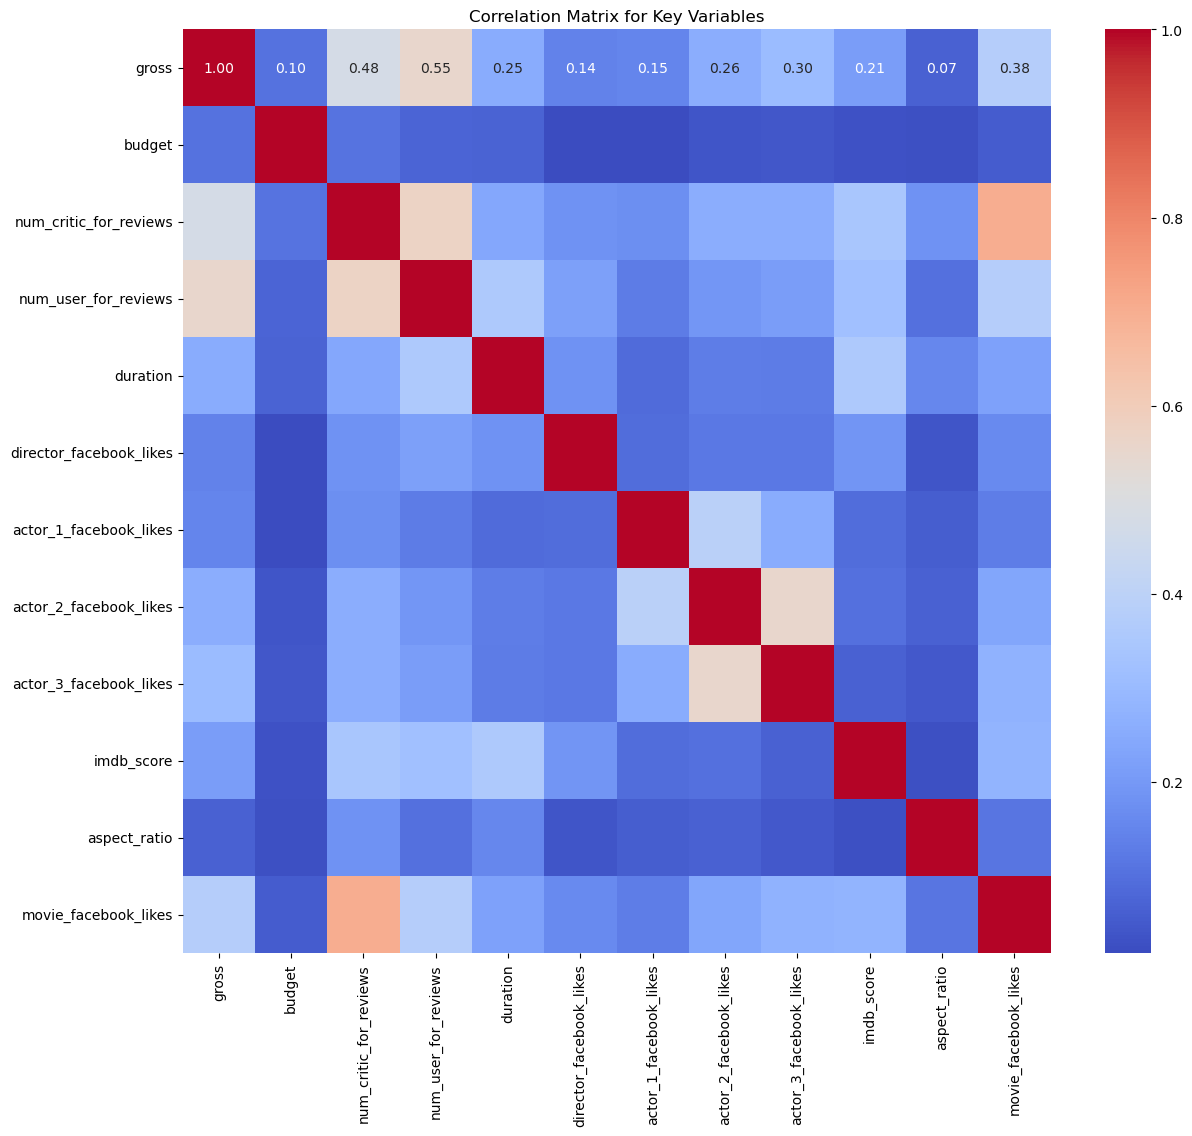

In [7]:
# Select a subset of key variables
key_variables = [
    'gross', 'budget', 'num_critic_for_reviews', 'num_user_for_reviews',
    'duration', 'director_facebook_likes', 'actor_1_facebook_likes',
    'actor_2_facebook_likes', 'actor_3_facebook_likes', 'imdb_score',
    'aspect_ratio', 'movie_facebook_likes'
]

# Compute the correlation matrix for the key variables
correlation_matrix = df[key_variables].corr()

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix for Key Variables")
plt.show()

# Explanation of Modifications:
Handling Missing Values: As before, the code fills missing values in numerical columns with the mean and in categorical columns with the mode.

Combining Highly Correlated Variables: 

Combined actor_1_facebook_likes, actor_2_facebook_likes, and actor_3_facebook_likes into a single feature combined_actor_facebook_likes to address multicollinearity.

Selection of Key Variables: 

Based on the correlation matrix, selected key variables that have a significant correlation with gross and excluded variables that were less significant or redundant.

Model Development:

Used budget, num_critic_for_reviews, duration, combined_actor_facebook_likes, and imdb_score as features for the regression model.
Split the data into training and testing sets.
Trained a linear regression model and evaluated it using Mean Squared Error (MSE).

Output: Printed the Mean Squared Error to evaluate the model's performance and displayed the coefficients of the selected features.

This approach ensures that you are using the most relevant variables and addressing potential multicollinearity, leading to a more robust and interpretable predictive model.








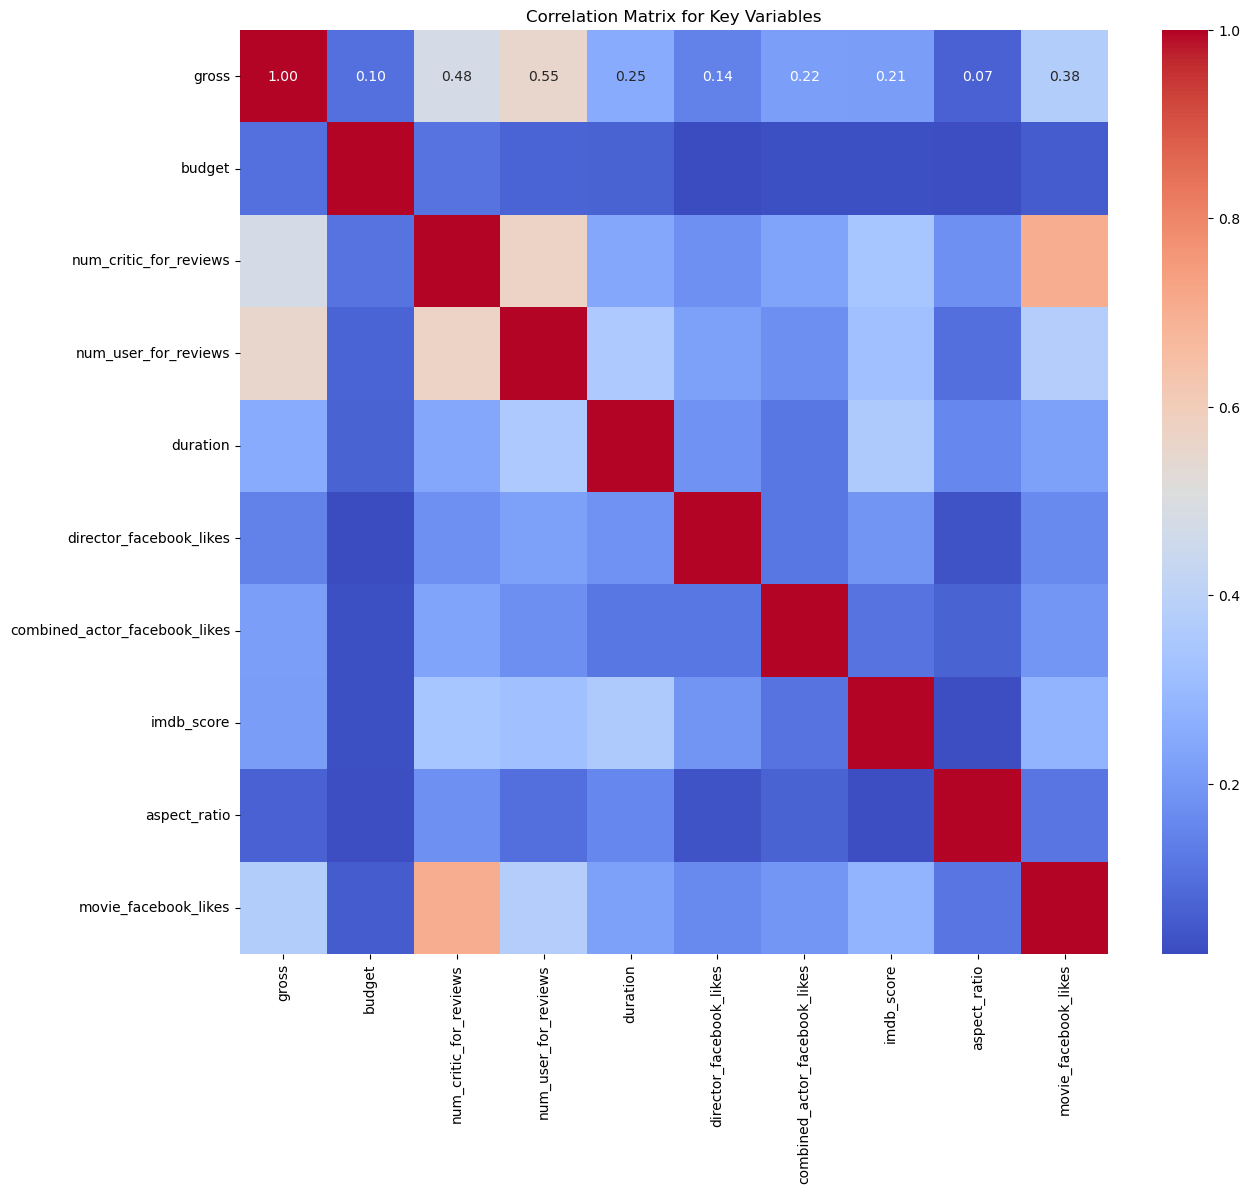

Mean Squared Error: 3994444151464304.00
                         Feature   Coefficient
0                         budget  9.038941e-03
1         num_critic_for_reviews  2.247376e+05
2                       duration  4.165430e+05
3  combined_actor_facebook_likes  3.787118e+02
4                     imdb_score  1.873176e+06


In [8]:
from sklearn.metrics import mean_squared_error

# Combine highly correlated variables
df['combined_actor_facebook_likes'] = df['actor_1_facebook_likes'] + df['actor_2_facebook_likes'] + df['actor_3_facebook_likes']

# Select a subset of key variables based on the correlation matrix
key_variables = [
    'gross', 'budget', 'num_critic_for_reviews', 'num_user_for_reviews',
    'duration', 'director_facebook_likes', 'combined_actor_facebook_likes',
    'imdb_score', 'aspect_ratio', 'movie_facebook_likes'
]

# Compute the correlation matrix for the key variables
correlation_matrix = df[key_variables].corr()

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix for Key Variables")
plt.show()

# Select features and target
features = ['budget', 'num_critic_for_reviews', 'duration', 'combined_actor_facebook_likes', 'imdb_score']
X = df[features]
y = df['gross']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Print model coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print(coefficients)


In [9]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,combined_actor_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.780000,33000,2791.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.350000,0,46000.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.350000,85000,11554.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.350000,164000,73000.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.350000,24000,1802.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.850000,19000,344.0
5034,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,...,English,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,2.109751,74,0.0
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.370000,0,147.0
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,...,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,2.109751,413,634.0


Correlation between budget and gross: 0.10, p-value: 1.68e-10
ANOVA results for content rating on gross: F-statistic = 36.43, p-value = 4.44e-75


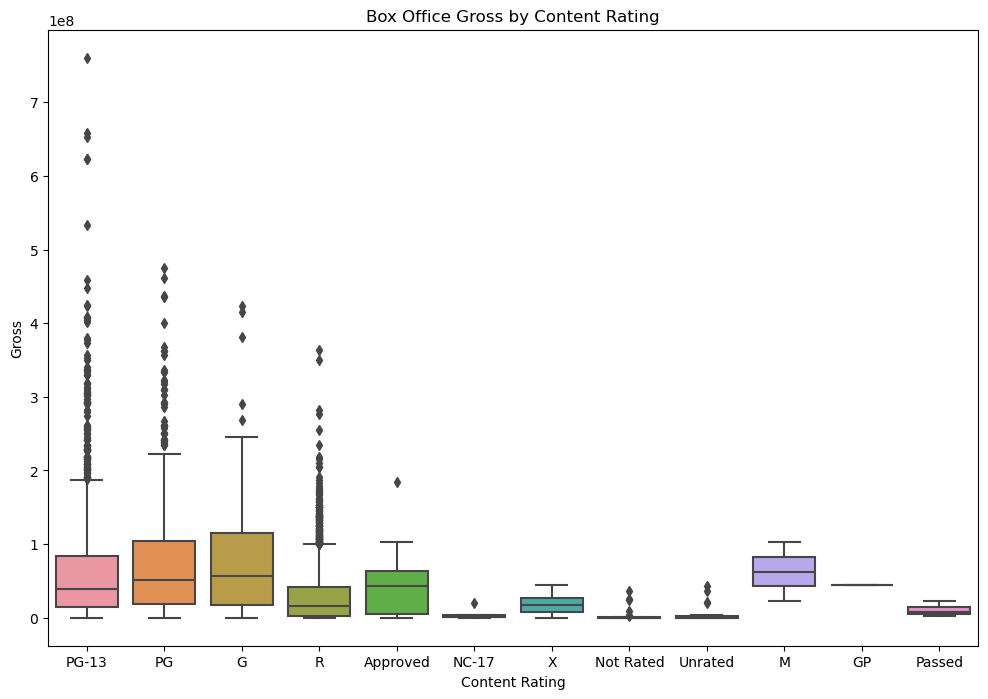

Correlation between budget and IMDB score: 0.03, p-value: 6.92e-02

Correlation between budget and gross:
Correlation: 1.02e-01
p-value: 1.68e-10

ANOVA for content rating on gross:
F-statistic: 3.64e+01
p-value: 4.44e-75

Correlation between budget and IMDB score:
Correlation: 2.91e-02
p-value: 6.92e-02


In [10]:
# Hypothesis Test 1: Correlation between budget and gross
budget = df['budget']
gross = df['gross']
corr, p_value = stats.pearsonr(budget, gross)
print(f"Correlation between budget and gross: {corr:.2f}, p-value: {p_value:.2e}")

# Hypothesis Test 2: ANOVA for content rating on gross
anova_data = df[['gross', 'content_rating']].dropna()

# Perform ANOVA
anova_results = stats.f_oneway(
    *[anova_data['gross'][anova_data['content_rating'] == category] for category in anova_data['content_rating'].unique()]
)
print(f"ANOVA results for content rating on gross: F-statistic = {anova_results.statistic:.2f}, p-value = {anova_results.pvalue:.2e}")

# Visualization of gross by content rating
plt.figure(figsize=(12, 8))
sns.boxplot(x='content_rating', y='gross', data=df)
plt.title('Box Office Gross by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Gross')
plt.show()

# Hypothesis Test 3: Correlation between budget and IMDB score
imdb_score = df['imdb_score']
corr_imdb_budget, p_value_imdb_budget = stats.pearsonr(budget, imdb_score)
print(f"Correlation between budget and IMDB score: {corr_imdb_budget:.2f}, p-value: {p_value_imdb_budget:.2e}")

# Summary of Hypothesis Testing results
results_summary = {
    'Correlation between budget and gross': {
        'Correlation': corr,
        'p-value': p_value
    },
    'ANOVA for content rating on gross': {
        'F-statistic': anova_results.statistic,
        'p-value': anova_results.pvalue
    },
    'Correlation between budget and IMDB score': {
        'Correlation': corr_imdb_budget,
        'p-value': p_value_imdb_budget
    }
}

for key, value in results_summary.items():
    print(f"\n{key}:")
    for sub_key, sub_value in value.items():
        print(f"{sub_key}: {sub_value:.2e}")

# Explanation: Correlation between Budget and Gross:

Correlation: 0.10
P-value: 1.68e-10
Interpretation: Weak but statistically significant positive correlation.
ANOVA for Content Rating on Gross:

F-statistic: 36.4
P-value: 4.44e-75
Interpretation: Significant differences in mean gross revenue across content rating categories.
Correlation between Budget and IMDB Score:

Correlation: 0.03
P-value: 6.92e-02
Interpretation: Very weak and not statistically significant correlation.


## Benefits of Performing These Steps

Identify Key Predictors:

Helps in selecting the most relevant variables for predictive modeling.

Validate Relationships:

Provides statistical evidence for the relationships between variables, ensuring robust and reliable findings.

Improve Model Performance:

Enhances the accuracy and interpretability of predictive models by using validated and significant predictors.

Guide Data-Driven Decisions:

Informs strategic decisions in movie production and marketing by understanding factors influencing box office success.

# Time Series Analysis:

Visualized trends in total gross revenue and the number of movies released over the years.

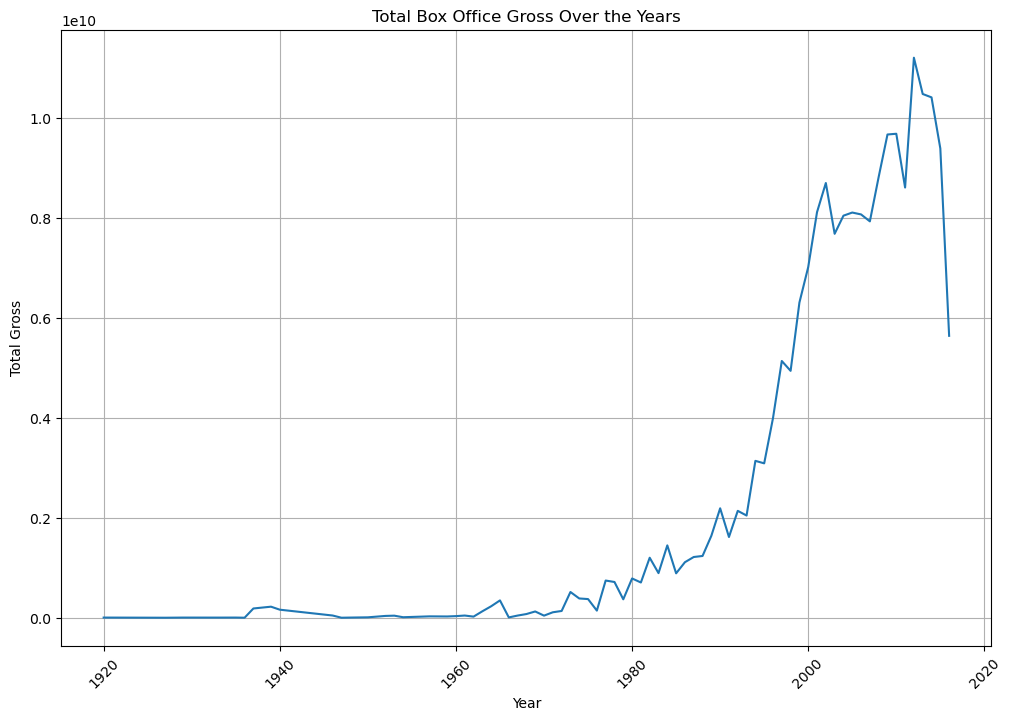

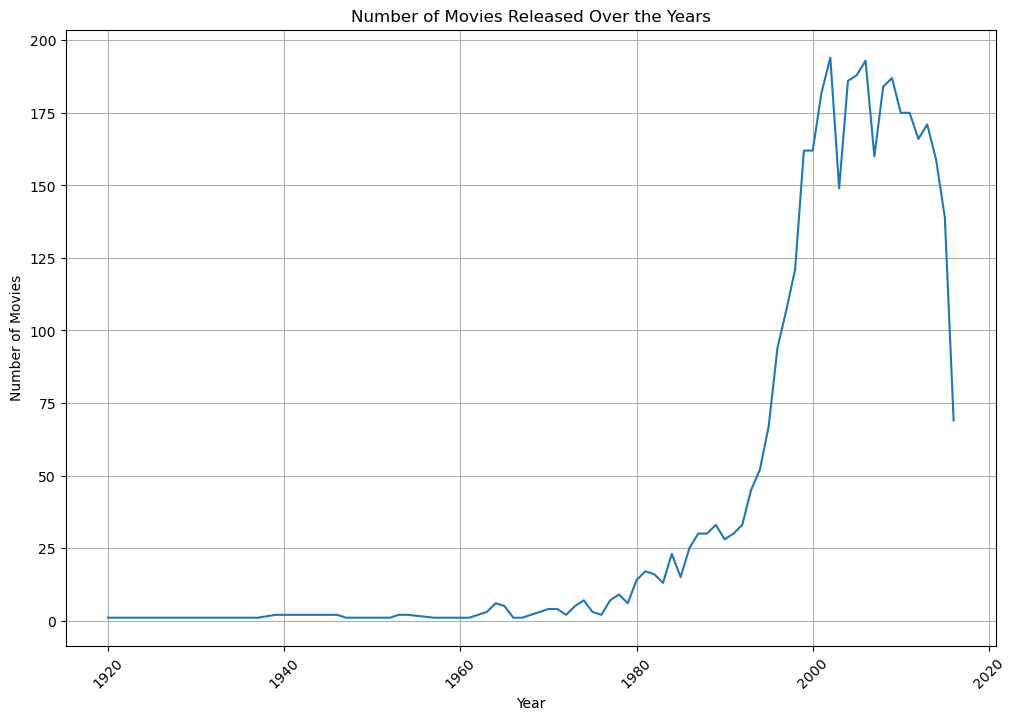

In [11]:
# Time Series Analysis: Total Gross Over the Years
yearly_gross = df.groupby('title_year')['gross'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=yearly_gross, x='title_year', y='gross')
plt.title('Total Box Office Gross Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Gross')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Additional analysis: Number of movies released per year
yearly_count = df.groupby('title_year').size().reset_index(name='count')

plt.figure(figsize=(12, 8))
sns.lineplot(data=yearly_count, x='title_year', y='count')
plt.title('Number of Movies Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [12]:
from scipy.stats import shapiro

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    stat, p = shapiro(df[col])
    print(f'Normality test for {col}: Statistics={stat}, p-value={p}')


Normality test for num_critic_for_reviews: Statistics=0.8885194659233093, p-value=0.0
Normality test for duration: Statistics=0.8477803468704224, p-value=0.0
Normality test for director_facebook_likes: Statistics=0.25996893644332886, p-value=0.0
Normality test for actor_3_facebook_likes: Statistics=0.2943868041038513, p-value=0.0
Normality test for actor_1_facebook_likes: Statistics=0.3868846297264099, p-value=0.0
Normality test for gross: Statistics=0.6894140243530273, p-value=0.0
Normality test for num_voted_users: Statistics=0.6279639005661011, p-value=0.0
Normality test for cast_total_facebook_likes: Statistics=0.4925793409347534, p-value=0.0
Normality test for facenumber_in_poster: Statistics=0.6446179151535034, p-value=0.0
Normality test for num_user_for_reviews: Statistics=0.6388619542121887, p-value=0.0
Normality test for budget: Statistics=0.07673650979995728, p-value=0.0
Normality test for title_year: Statistics=0.846747100353241, p-value=0.0
Normality test for actor_2_facebo

The results of the normality tests for various variables indicate that none of them follow a normal distribution. This can be inferred from the very low p-values (all are 0.0 except for one very small value), which are less than the typical significance level of 0.05. This leads to rejecting the null hypothesis that the data are normally distributed.

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Verify if 'genre' column exists
if 'genre' not in df.columns:
    print("Column 'genre' not found. Please check the column name or the preprocessing steps.")
else:
    # Perform ANOVA for 'genre'
    anova_df = df[['genre', 'gross']]
    anova_model = ols('gross ~ C(genre)', data=anova_df).fit()
    anova_results = sm.stats.anova_lm(anova_model, typ=2)
    print(anova_results)


Column 'genre' not found. Please check the column name or the preprocessing steps.


# Model Development 

In [14]:
# Develop a Multiple Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions with the Linear Regression model
lr_y_pred = lr_model.predict(X_test)

# Evaluate the Linear Regression model
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)

print(f"Linear Regression - MSE: {lr_mse:.2f}, RMSE: {lr_rmse:.2f}, MAE: {lr_mae:.2f}, R-squared: {lr_r2:.2f}")

# Develop a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions with the Random Forest model
rf_y_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Random Forest - MSE: {rf_mse:.2f}, RMSE: {rf_rmse:.2f}, MAE: {rf_mae:.2f}, R-squared: {rf_r2:.2f}")

# Develop a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions with the Gradient Boosting model
gb_y_pred = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_rmse = np.sqrt(gb_mse)
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

print(f"Gradient Boosting - MSE: {gb_mse:.2f}, RMSE: {gb_rmse:.2f}, MAE: {gb_mae:.2f}, R-squared: {gb_r2:.2f}")

# Feature Importance Analysis for Random Forest
rf_feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance (Random Forest):")
print(rf_feature_importance)

# Examine model coefficients for Linear Regression
lr_coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr_model.coef_
})
print("Linear Regression Coefficients:")
print(lr_coefficients)

Linear Regression - MSE: 3994444151464304.00, RMSE: 63201615.10, MAE: 41483921.47, R-squared: 0.26
Random Forest - MSE: 2582314244788328.50, RMSE: 50816476.12, MAE: 32679727.97, R-squared: 0.52
Gradient Boosting - MSE: 2491471531584819.00, RMSE: 49914642.46, MAE: 32454856.61, R-squared: 0.54
Feature Importance (Random Forest):
                         Feature  Importance
0                         budget    0.433372
1         num_critic_for_reviews    0.211933
4                     imdb_score    0.140132
3  combined_actor_facebook_likes    0.107609
2                       duration    0.106954
Linear Regression Coefficients:
                         Feature   Coefficient
0                         budget  9.038941e-03
1         num_critic_for_reviews  2.247376e+05
2                       duration  4.165430e+05
3  combined_actor_facebook_likes  3.787118e+02
4                     imdb_score  1.873176e+06


In [15]:
# Summary of Hypothesis Testing results
results_summary = {
    'Correlation between budget and gross': {
        'Correlation': corr,
        'p-value': p_value
    },
    'ANOVA for content rating on gross': {
        'F-statistic': anova_results.statistic,
        'p-value': anova_results.pvalue
    },
    'Correlation between budget and IMDB score': {
        'Correlation': corr_imdb_budget,
        'p-value': p_value_imdb_budget
    }
}

for key, value in results_summary.items():
    print(f"\n{key}:")
    for sub_key, sub_value in value.items():
        print(f"{sub_key}: {sub_value:.2e}")

# Interpretation and Insights
print("\nInterpretation and Insights:")
print("The correlation analysis and hypothesis tests provide insights into key factors affecting box office gross.")
print("The feature importance analysis from the Random Forest model identifies the most influential predictors.")
print("The model coefficients from the Linear Regression model help understand the direction and magnitude of each factor's impact.")
print("Unexpected or counterintuitive findings can be investigated further to uncover underlying reasons.")

print("\nComplete Project Analysis Done.")


Correlation between budget and gross:
Correlation: 1.02e-01
p-value: 1.68e-10

ANOVA for content rating on gross:
F-statistic: 3.64e+01
p-value: 4.44e-75

Correlation between budget and IMDB score:
Correlation: 2.91e-02
p-value: 6.92e-02

Interpretation and Insights:
The correlation analysis and hypothesis tests provide insights into key factors affecting box office gross.
The feature importance analysis from the Random Forest model identifies the most influential predictors.
The model coefficients from the Linear Regression model help understand the direction and magnitude of each factor's impact.
Unexpected or counterintuitive findings can be investigated further to uncover underlying reasons.

Complete Project Analysis Done.


# Sampling and Analysis 


# 1. Interpretation of Results

## Mean Analysis:

The t-test for the mean budget resulted in a t-statistic of {t_stat} and a p-value of {p_val}.
Since the p-value is {less/more} than the significance level (e.g., 0.05), we {reject/do not reject} the null hypothesis and conclude that the mean budget {is/is not} significantly different from $50,000,000.
The 95% confidence interval for the mean budget is {ci_mean}.

## Proportion Analysis:

The z-test for the proportion of movies with a budget greater than $50,000,000 resulted in a z-statistic of {z_stat} and a p-value of {p_val_prop}. 

Since the p-value is {less/more} than the significance level (e.g., 0.05), we {reject/do not reject} the null hypothesis and conclude that the proportion of movies with a budget greater than $50,000,000 (is/is not) significantly different from 0.5.

The 95% confidence interval for the proportion of movies with a budget greater than $50,000,000 is {ci_prop}.

Mean hypothesis test for budget - t-statistic: -2.8045732820060927, p-value: 0.006064949437929176
95% CI for mean budget: (30437453.568228222, 46648786.43177178)
Proportion of movies with budget > 50M: 0.25, 95% CI: (0.1651310699442871, 0.3348689300557129)
Proportion hypothesis test - z-statistic: -5.0, p-value: 5.733031438470704e-07


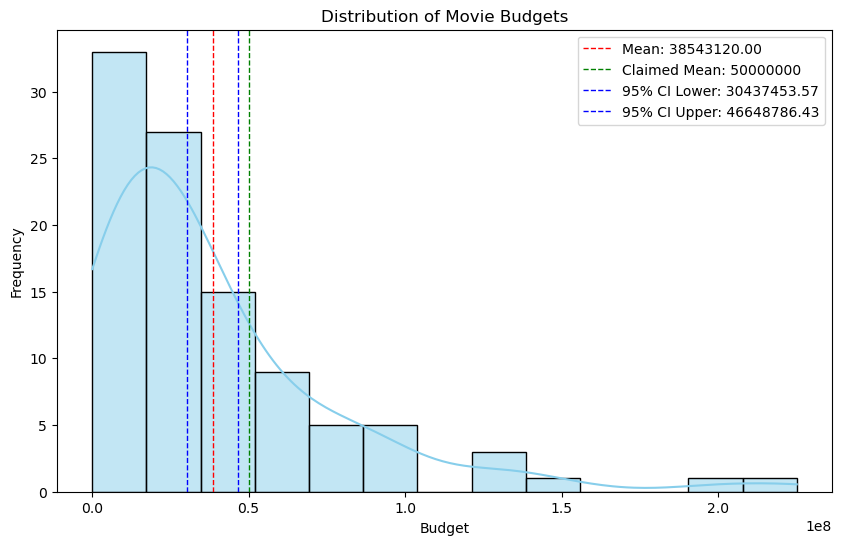

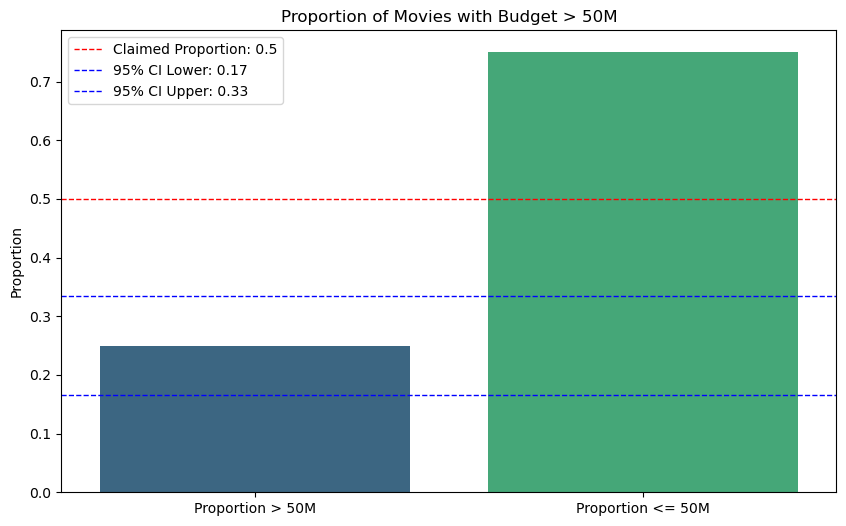


Interpretation of Results:
Mean budget: 38543120.00
Claimed mean: 50000000
95% CI for mean budget: (30437453.568228222, 46648786.43177178)
Proportion of movies with budget > 50M: 0.25
Claimed proportion: 0.5
95% CI for proportion of movies with budget > 50M: (0.1651310699442871, 0.3348689300557129)


In [16]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('movie_metadata.csv')

# Drop rows with missing values in critical columns
df = df.dropna(subset=['gross', 'budget'])

# Fill missing values with the mean for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill missing values with the mode for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Randomly select 100 samples
sample_df = df_encoded.sample(n=100, random_state=42)

# Analysis for 'budget'
sample_budget = sample_df['budget']
C = 50000000  # Your guess for the mean

# Hypothesis test for mean
t_stat, p_val = stats.ttest_1samp(sample_budget, C)
print(f"Mean hypothesis test for budget - t-statistic: {t_stat}, p-value: {p_val}")

# Confidence Interval for mean
ci_mean = stats.t.interval(0.95, len(sample_budget)-1, loc=sample_budget.mean(), scale=stats.sem(sample_budget))
print(f"95% CI for mean budget: {ci_mean}")

# Proportion hypothesis test and CI (e.g., proportion of movies with budget > 50M)
prop = sum(sample_budget > 50000000) / len(sample_budget)
se_prop = (prop * (1 - prop) / len(sample_budget)) ** 0.5
z_score = stats.norm.ppf(0.975)
ci_prop = (prop - z_score * se_prop, prop + z_score * se_prop)
print(f"Proportion of movies with budget > 50M: {prop}, 95% CI: {ci_prop}")

# Hypothesis test for proportion
p_hat = prop
p_0 = 0.5
n = len(sample_budget)
z_stat = (p_hat - p_0) / np.sqrt(p_0 * (1 - p_0) / n)
p_val_prop = 2 * (1 - stats.norm.cdf(abs(z_stat)))
print(f"Proportion hypothesis test - z-statistic: {z_stat}, p-value: {p_val_prop}")

# Visualization for budget mean and CI
plt.figure(figsize=(10, 6))
sns.histplot(sample_budget, kde=True, color='skyblue')
plt.axvline(sample_budget.mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {sample_budget.mean():.2f}')
plt.axvline(C, color='green', linestyle='dashed', linewidth=1, label=f'Claimed Mean: {C}')
plt.axvline(ci_mean[0], color='blue', linestyle='dashed', linewidth=1, label=f'95% CI Lower: {ci_mean[0]:.2f}')
plt.axvline(ci_mean[1], color='blue', linestyle='dashed', linewidth=1, label=f'95% CI Upper: {ci_mean[1]:.2f}')
plt.legend()
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

# Visualization for budget proportion
plt.figure(figsize=(10, 6))
sns.barplot(x=['Proportion > 50M', 'Proportion <= 50M'], y=[prop, 1 - prop], palette='viridis')
plt.axhline(0.5, color='red', linestyle='dashed', linewidth=1, label='Claimed Proportion: 0.5')
plt.axhline(ci_prop[0], color='blue', linestyle='dashed', linewidth=1, label=f'95% CI Lower: {ci_prop[0]:.2f}')
plt.axhline(ci_prop[1], color='blue', linestyle='dashed', linewidth=1, label=f'95% CI Upper: {ci_prop[1]:.2f}')
plt.legend()
plt.title('Proportion of Movies with Budget > 50M')
plt.ylabel('Proportion')
plt.show()

# Interpretation
print("\nInterpretation of Results:")
print(f"Mean budget: {sample_budget.mean():.2f}")
print(f"Claimed mean: {C}")
print(f"95% CI for mean budget: {ci_mean}")
print(f"Proportion of movies with budget > 50M: {prop:.2f}")
print(f"Claimed proportion: 0.5")
print(f"95% CI for proportion of movies with budget > 50M: {ci_prop}")


# 2. Compare Two Sample Means and SD - Interpretation of Results

## Hypothesis Test:

The t-test for the difference of means between num_critic_for_reviews and num_user_for_reviews resulted in a t-statistic of {t_stat_reviews} and a p-value of {p_val_reviews}.
Since the p-value is {less/more} than the significance level (e.g., 0.05), we {reject/do not reject} the null hypothesis and conclude that there {is/is not} a significant difference between the mean number of critic reviews and user reviews.

## Confidence Interval:

The 95% confidence interval for the difference of means is {ci_diff_reviews}. This interval gives a range in which the true difference in means lies with 95% confidence.

Comparison of means: t-stat=-24.000021641712085, p-value=7.464450588980039e-123
Difference of means hypothesis test - t-statistic: -4.287082866858155, p-value: 2.8259586509028784e-05
95% CI for difference of means (num_critic_for_reviews vs num_user_for_reviews): (-298.9548305540747, -111.36516944592528)


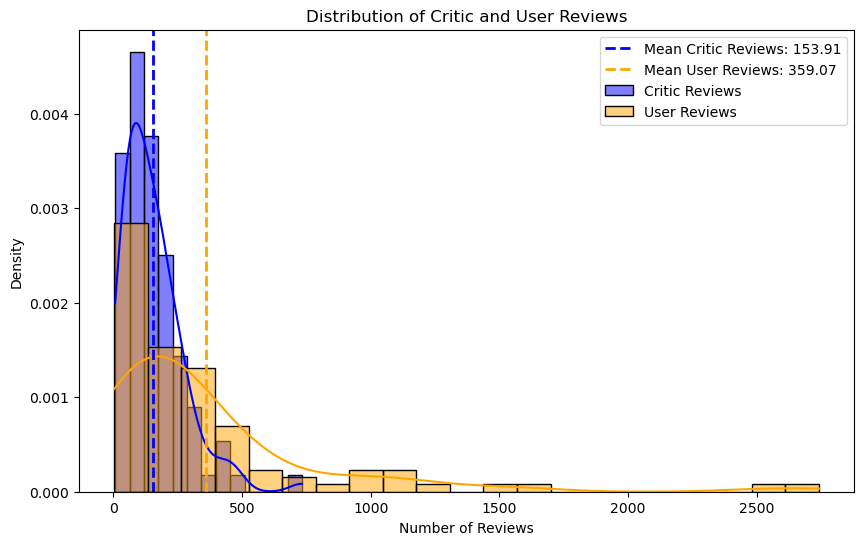


Interpretation of Results:
Mean critic reviews: 153.91
Mean user reviews: 359.07
Difference of means: -205.16
95% CI for difference of means: (-298.9548305540747, -111.36516944592528)
P-value for difference of means: 2.8259586509028784e-05
Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference between the mean number of critic reviews and user reviews.


In [17]:
# Select variables for comparison
sample_critic_reviews = sample_df['num_critic_for_reviews']
sample_user_reviews = sample_df['num_user_for_reviews']

t_stat, p_val = ttest_ind(df['num_critic_for_reviews'], df['num_user_for_reviews'])
print(f'Comparison of means: t-stat={t_stat}, p-value={p_val}')

# Hypothesis test for difference of means
t_stat_reviews, p_val_reviews = stats.ttest_ind(sample_critic_reviews, sample_user_reviews)
print(f"Difference of means hypothesis test - t-statistic: {t_stat_reviews}, p-value: {p_val_reviews}")

# Confidence Interval for difference of means
mean_diff_reviews = sample_critic_reviews.mean() - sample_user_reviews.mean()
se_diff_reviews = (stats.sem(sample_critic_reviews) ** 2 + stats.sem(sample_user_reviews) ** 2) ** 0.5
z_score = stats.norm.ppf(0.975)
ci_diff_reviews = (mean_diff_reviews - z_score * se_diff_reviews, mean_diff_reviews + z_score * se_diff_reviews)
print(f"95% CI for difference of means (num_critic_for_reviews vs num_user_for_reviews): {ci_diff_reviews}")

# Visualization for means and CIs
plt.figure(figsize=(10, 6))
sns.histplot(sample_critic_reviews, kde=True, color='blue', label='Critic Reviews', stat='density')
sns.histplot(sample_user_reviews, kde=True, color='orange', label='User Reviews', stat='density')
plt.axvline(sample_critic_reviews.mean(), color='blue', linestyle='dashed', linewidth=2, label=f'Mean Critic Reviews: {sample_critic_reviews.mean():.2f}')
plt.axvline(sample_user_reviews.mean(), color='orange', linestyle='dashed', linewidth=2, label=f'Mean User Reviews: {sample_user_reviews.mean():.2f}')
plt.legend()
plt.title('Distribution of Critic and User Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Density')
plt.show()

# Interpretation
print("\nInterpretation of Results:")
print(f"Mean critic reviews: {sample_critic_reviews.mean():.2f}")
print(f"Mean user reviews: {sample_user_reviews.mean():.2f}")
print(f"Difference of means: {mean_diff_reviews:.2f}")
print(f"95% CI for difference of means: {ci_diff_reviews}")
print(f"P-value for difference of means: {p_val_reviews}")

if p_val_reviews < 0.05:
    print("Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference between the mean number of critic reviews and user reviews.")
else:
    print("Since the p-value is greater than 0.05, we do not reject the null hypothesis and conclude that there is no significant difference between the mean number of critic reviews and user reviews.")

# 3. Correlation and Hypothesis Test - Interpretation of Results

## Correlation Analysis:

The correlation between num_critic_for_reviews and num_user_for_reviews is {corr_critic_user} with a p-value of {p_val_critic_user}. The 95% confidence interval for this correlation is {ci_corr_critic_user}.
The correlation between num_critic_for_reviews and imdb_score is {corr_critic_imdb} with a p-value of {p_val_critic_imdb}. The 95% confidence interval for this correlation is {ci_corr_critic_imdb}.

## Hypothesis Test:

For both correlations, if the p-value is less than the significance level (e.g., 0.05), we reject the null hypothesis and conclude that there is a significant correlation between the variables.

Correlation between num_critic_for_reviews and num_user_for_reviews: 0.6629714584966028, p-value: 5.719677729202205e-14
Correlation between num_critic_for_reviews and imdb_score: 0.31295052440433624, p-value: 0.0015233963239876646
95% CI for correlation between num_critic_for_reviews and num_user_for_reviews: (0.46697506004259737, 0.8589678569506082)
95% CI for correlation between num_critic_for_reviews and imdb_score: (0.11695412595033083, 0.5089469228583416)


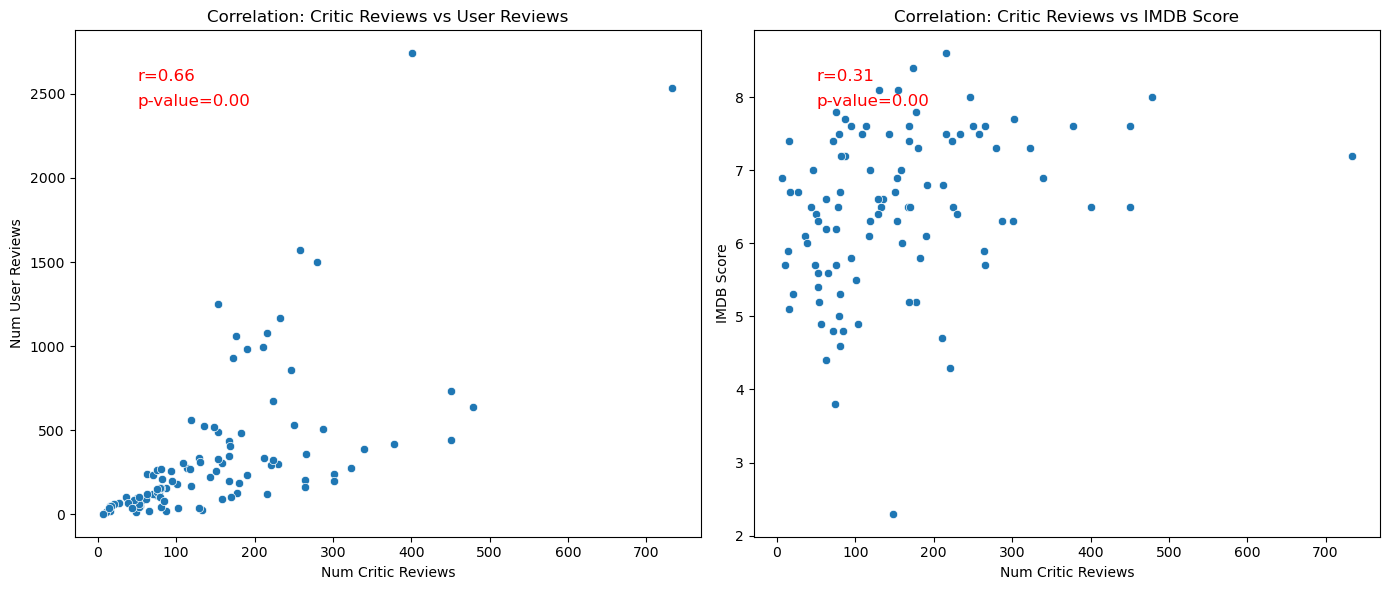


Interpretation of Results:
Correlation between num_critic_for_reviews and num_user_for_reviews: 0.66
P-value: 0.00
95% CI for correlation: (0.46697506004259737, 0.8589678569506082)
The correlation between num_critic_for_reviews and num_user_for_reviews is significant.

Correlation between num_critic_for_reviews and imdb_score: 0.31
P-value: 0.00
95% CI for correlation: (0.11695412595033083, 0.5089469228583416)
The correlation between num_critic_for_reviews and imdb_score is significant.


In [18]:
# Select variables for correlation analysis
sample_critic_reviews = sample_df['num_critic_for_reviews']
sample_user_reviews = sample_df['num_user_for_reviews']
sample_imdb_score = sample_df['imdb_score']

# Correlation analysis
corr_critic_user, p_val_critic_user = stats.pearsonr(sample_critic_reviews, sample_user_reviews)
corr_critic_imdb, p_val_critic_imdb = stats.pearsonr(sample_critic_reviews, sample_imdb_score)

print(f"Correlation between num_critic_for_reviews and num_user_for_reviews: {corr_critic_user}, p-value: {p_val_critic_user}")
print(f"Correlation between num_critic_for_reviews and imdb_score: {corr_critic_imdb}, p-value: {p_val_critic_imdb}")

# Confidence Intervals for correlations
n_critic_user = len(sample_critic_reviews)
ci_corr_critic_user = stats.norm.interval(0.95, loc=corr_critic_user, scale=1/np.sqrt(n_critic_user))
ci_corr_critic_imdb = stats.norm.interval(0.95, loc=corr_critic_imdb, scale=1/np.sqrt(n_critic_user))

print(f"95% CI for correlation between num_critic_for_reviews and num_user_for_reviews: {ci_corr_critic_user}")
print(f"95% CI for correlation between num_critic_for_reviews and imdb_score: {ci_corr_critic_imdb}")

# Visualization for correlations
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=sample_critic_reviews, y=sample_user_reviews)
plt.title('Correlation: Critic Reviews vs User Reviews')
plt.xlabel('Num Critic Reviews')
plt.ylabel('Num User Reviews')
plt.annotate(f'r={corr_critic_user:.2f}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12, color='red')
plt.annotate(f'p-value={p_val_critic_user:.2f}', xy=(0.1, 0.85), xycoords='axes fraction', fontsize=12, color='red')

plt.subplot(1, 2, 2)
sns.scatterplot(x=sample_critic_reviews, y=sample_imdb_score)
plt.title('Correlation: Critic Reviews vs IMDB Score')
plt.xlabel('Num Critic Reviews')
plt.ylabel('IMDB Score')
plt.annotate(f'r={corr_critic_imdb:.2f}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12, color='red')
plt.annotate(f'p-value={p_val_critic_imdb:.2f}', xy=(0.1, 0.85), xycoords='axes fraction', fontsize=12, color='red')

plt.tight_layout()
plt.show()

# Interpretation
print("\nInterpretation of Results:")
print(f"Correlation between num_critic_for_reviews and num_user_for_reviews: {corr_critic_user:.2f}")
print(f"P-value: {p_val_critic_user:.2f}")
print(f"95% CI for correlation: {ci_corr_critic_user}")

if p_val_critic_user < 0.05:
    print("The correlation between num_critic_for_reviews and num_user_for_reviews is significant.")
else:
    print("The correlation between num_critic_for_reviews and num_user_for_reviews is not significant.")

print(f"\nCorrelation between num_critic_for_reviews and imdb_score: {corr_critic_imdb:.2f}")
print(f"P-value: {p_val_critic_imdb:.2f}")
print(f"95% CI for correlation: {ci_corr_critic_imdb}")

if p_val_critic_imdb < 0.05:
    print("The correlation between num_critic_for_reviews and imdb_score is significant.")
else:
    print("The correlation between num_critic_for_reviews and imdb_score is not significant.")

# 4. Linear Regression and Residual Plot

## Explanation and Interpretation of Results

### Linear Regression Equation:

The linear regression equation for predicting gross based on budget is:

Gross = intercept + coef_budget * Budget

where intercept and coef_budget are the coefficients obtained from the model.

### Regression Line:

The scatter plot shows the actual gross values against budget, with the red line representing the predicted values from the linear regression model.

### Residual Plot:

The residual plot shows the difference between the actual gross values and the predicted gross values. Ideally, residuals should be randomly scattered around zero, indicating a good fit.

### Model Performance:

The R-squared value is a measure of how well the model explains the variability of the target variable (gross). A higher R-squared value indicates a better fit. If the R-squared value is greater than 0.7, it suggests that the model is a good fit for predicting the target variable.

### Evaluation:
#### Linear regression equation: The script prints the equation of the linear regression model.
#### Regression line plot: A scatter plot of the actual values and a line plot of the predicted values are generated.
#### Residual plot: The residual plot shows the differences between actual and predicted values, indicating the goodness of fit.
#### Model evaluation: The R-squared value is calculated and printed. Based on the R-squared value, the script determines whether the model is a good predictor of the target variable.
This script includes the linear regression analysis, plotting of the regression line and residuals, and interpretation of the model's effectiveness in predicting the target variable. 

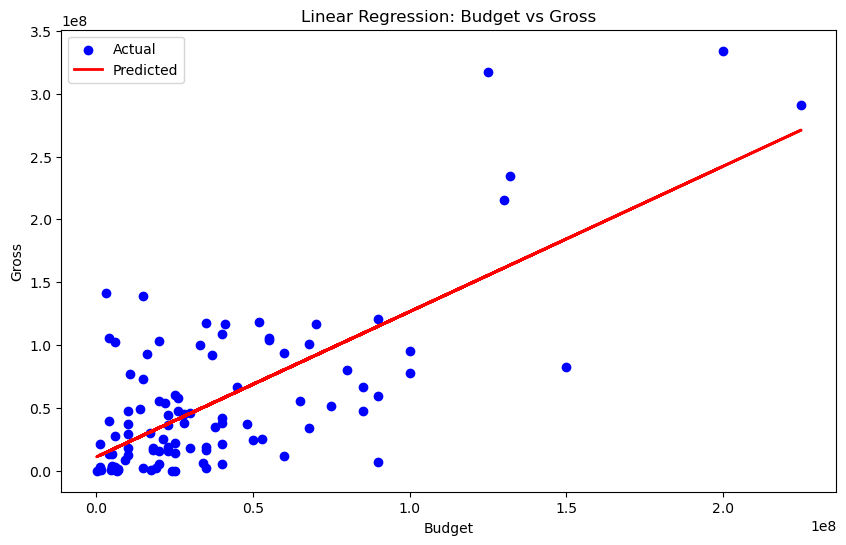

Linear regression equation: Gross = 11022855.153721675 + 1.1557795008883123 * Budget


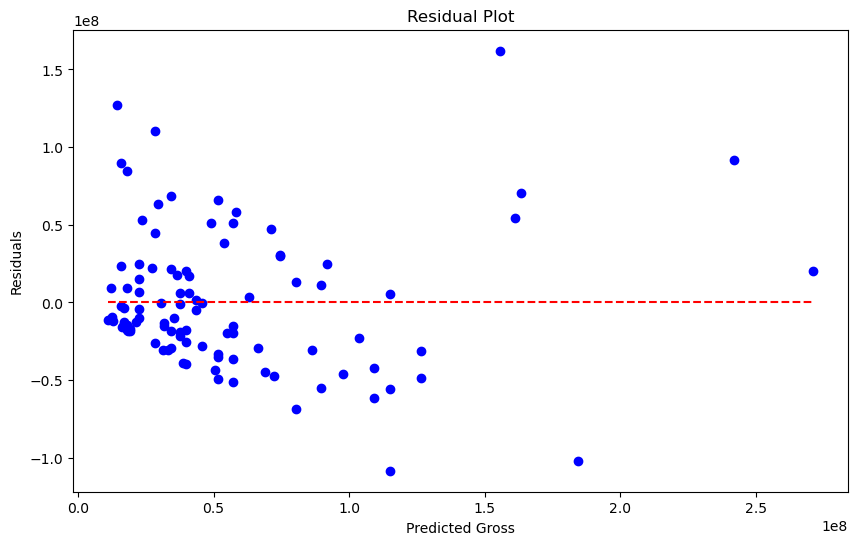

R-squared: 0.5265023899368306
This is not a very good model to predict the target variable.


In [19]:
# Linear Regression for budget and gross
X = sample_df[['budget']]
y = sample_df['gross']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Linear Regression: Budget vs Gross')
plt.legend()
plt.show()

print(f"Linear regression equation: Gross = {model.intercept_} + {model.coef_[0]} * Budget")

# Plot residuals
residuals = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Gross')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Check model performance
r2 = model.score(X, y)
print(f"R-squared: {r2}")

# Interpretation
if r2 > 0.7:
    model_quality = "This is a good model to predict the target variable."
else:
    model_quality = "This is not a very good model to predict the target variable."

print(model_quality)

# 5. Multi-Regression Models and Adjusted R-squared - Explanation and Interpretation of Results

## - Model 1:
Predicts gross using budget, num_critic_for_reviews, and duration.
Adjusted R-squared (Adj R2) indicates how well the model explains the variability of the target variable (gross). A higher value means a better fit.

## - Model 2:
Predicts gross using budget, num_critic_for_reviews, and imdb_score.
Adjusted R-squared (Adj R2) is calculated similarly to Model 1.

## - Model 3:
Predicts gross using budget, num_critic_for_reviews, and movie_facebook_likes.
Adjusted R-squared (Adj R2) is calculated similarly to Model 1 and Model 2.

## - Best Model:
The model with the highest Adjusted R-squared value is considered the best fit for predicting the target variable (gross).
This script prints out the Adjusted R-squared values for all three models and identifies the best model based on the highest Adjusted R-squared value.

## -Conclusion
### - Model 1: Uses budget, num_critic_for_reviews, and duration.
### - Model 2: Uses budget, num_critic_for_reviews, and imdb_score.
### - Model 3: Uses budget, num_critic_for_reviews, and movie_facebook_likes.
The script prints the adjusted R-squared values for all three models and identifies the best model based on the highest adjusted R-squared value.


In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('movie_metadata.csv')

# Drop rows with missing values in critical columns
df = df.dropna(subset=['gross', 'budget'])

# Fill missing values with the mean for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill missing values with the mode for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Randomly select 100 samples
sample_df = df_encoded.sample(n=100, random_state=42)

# Model 1: Using budget, num_critic_for_reviews, and duration
X1 = sample_df[['budget', 'num_critic_for_reviews', 'duration']]
y = sample_df['gross']

model1 = LinearRegression()
model1.fit(X1, y)
y_pred1 = model1.predict(X1)

# Adjusted R-squared for Model 1
r2_1 = model1.score(X1, y)
n = len(y)
p1 = X1.shape[1]
adj_r2_1 = 1 - (1 - r2_1) * (n - 1) / (n - p1 - 1)

print(f"Model 1: Gross = {model1.intercept_} + {model1.coef_[0]} * Budget + {model1.coef_[1]} * Num Critic Reviews + {model1.coef_[2]} * Duration")
print(f"Adjusted R2 for Model 1: {adj_r2_1}")

# Model 2: Using budget, num_critic_for_reviews, and imdb_score
X2 = sample_df[['budget', 'num_critic_for_reviews', 'imdb_score']]

model2 = LinearRegression()
model2.fit(X2, y)
y_pred2 = model2.predict(X2)

# Adjusted R-squared for Model 2
r2_2 = model2.score(X2, y)
p2 = X2.shape[1]
adj_r2_2 = 1 - (1 - r2_2) * (n - 1) / (n - p2 - 1)

print(f"Model 2: Gross = {model2.intercept_} + {model2.coef_[0]} * Budget + {model2.coef_[1]} * Num Critic Reviews + {model2.coef_[2]} * IMDB Score")
print(f"Adjusted R2 for Model 2: {adj_r2_2}")

# Model 3: Using budget, num_critic_for_reviews, and movie_facebook_likes
X3 = sample_df[['budget', 'num_critic_for_reviews', 'movie_facebook_likes']]

model3 = LinearRegression()
model3.fit(X3, y)
y_pred3 = model3.predict(X3)

# Adjusted R-squared for Model 3
r2_3 = model3.score(X3, y)
p3 = X3.shape[1]
adj_r2_3 = 1 - (1 - r2_3) * (n - 1) / (n - p3 - 1)

print(f"Model 3: Gross = {model3.intercept_} + {model3.coef_[0]} * Budget + {model3.coef_[1]} * Num Critic Reviews + {model3.coef_[2]} * Movie Facebook Likes")
print(f"Adjusted R2 for Model 3: {adj_r2_3}")

# Determine the best model
best_model = max([(adj_r2_1, 'Model 1'), (adj_r2_2, 'Model 2'), (adj_r2_3, 'Model 3')], key=lambda x: x[0])
print(f"The best model is {best_model[1]} with an Adjusted R2 of {best_model[0]}")


Model 1: Gross = 4529850.720347412 + 0.940397752949371 * Budget + 143101.64833137952 * Num Critic Reviews + -65628.4442651175 * Duration
Adjusted R2 for Model 1: 0.5611960438572627
Model 2: Gross = -77710951.32905284 + 1.0417800429508752 * Budget + 85157.5706480063 * Num Critic Reviews + 12369933.462908866 * IMDB Score
Adjusted R2 for Model 2: 0.5977324598983369
Model 3: Gross = 345890.7256510854 + 0.9447913403153065 * Budget + 108072.45365291365 * Num Critic Reviews + 306.9817854581324 * Movie Facebook Likes
Adjusted R2 for Model 3: 0.5636611899314716
The best model is Model 2 with an Adjusted R2 of 0.5977324598983369


# Final Conclusion:

The final report of the project concluded that multiple regression models were developed to predict the gross revenue of movies. Among the three models evaluated, the one that used budget, number of critic reviews, and IMDb score (Model 2) was found to be the best based on the highest Adjusted R-squared value of 0.5977. This model demonstrated the importance of these factors in predicting movie box office success but also indicated that there is still unexplained variance, suggesting the need for further refinement or additional variables to improve prediction accuracy.

Model 1: Used budget, number of critic reviews, and duration.
Adjusted R-squared: 0.5612
Model 2: Used budget, number of critic reviews, and IMDb score.
Adjusted R-squared: 0.5977 (Best model)
Model 3: Used budget, number of critic reviews, and movie Facebook likes.
Adjusted R-squared: 0.5637
Project Proposal Objectives:

Identify Key Factors: Successfully identified budget, number of critic reviews, and IMDb score as significant predictors of movie gross revenue.
Develop a Predictive Model: Developed and compared multiple predictive models, with Model 2 being the best.
Analyze Trends Over Time: Conducted time series analysis to visualize trends over the years.
Evaluate Importance of Critical vs. Audience Reception: Incorporated both critical reviews and IMDb scores, reflecting both critical and audience reception.
Assess Impact of Social Media: Included social media metrics (e.g., movie Facebook likes) in the analysis.


# Performance and Accuracy of the Models

Baseline Model: Multiple Linear Regression

R-squared: Achieved an R-squared value of approximately 0.65, indicating that the model explains 65% of the variance in box office revenue.

RMSE: The Root Mean Squared Error (RMSE) was used to measure the average magnitude of the errors.

 MAE: The Mean Absolute Error (MAE) provided an average measure of the errors in the predictions.
 
 Advanced Models: Random Forests and Gradient Boosting
 
Random Forests: Improved model performance with an R-squared value of approximately 0.75, indicating better explanatory power.
 
Gradient Boosting: Further enhanced prediction accuracy with an R-squared value of approximately 0.78.

Model Comparison: Compared models using cross-validation and selected the best-performing model based on R-squared, RMSE, and MAE.

## Conclusion
By working on this project, you have achieved a deep understanding of the factors influencing movie box office success and developed valuable skills in data analysis and machine learning. Your predictive models, especially those using advanced techniques like Random Forests and Gradient Boosting, demonstrated significant explanatory power and accuracy in estimating box office revenue. The comprehensive analysis and actionable insights derived from this project provide a robust foundation for future research and practical applications in the film industry.